In [2]:
!pip install fasteda

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=f20b15e34bea979209ca29e2803783f0d6a68f192b0ce049bc272ce3020b75fc
  Stored in directory: c:\users\pavan\appdata\local\pip\cache\wheels\93\57\7e\fdc4b9923cf3f1f46de4e2ea7a5a4acb335357f919920ffb7c
Successfully built fasteda


In [3]:
import numpy as np
import pandas as pd
from fasteda import fast_eda as fe
import matplotlib.pyplot as plt

## Data Import and Understanding

In [18]:
def import_data(train_url: str, test_url: str):
    train = pd.read_csv(train_url)
    test = pd.read_csv(test_url)
    print(f'Training Data Shape: {train.shape}\nTesting Data Shape:{test.shape}\n')
    print(f'{"="*5} TRAINING DATA INFO {"="*5}')
    print(f'{train.info()}\n')
    
    print(f'{"="*5} TESTING DATA INFO {"="*5}')
    print(f'{test.info()}\n')
    return train, test

In [19]:
train, test = import_data('datasets/KG_TPS_3.13/train.csv', 'datasets/KG_TPS_3.13/test.csv')

Training Data Shape: (707, 66)
Testing Data Shape:(303, 65)

===== TRAINING DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding   

In [42]:
n_classes = len(train['prognosis'].unique())

DataFrame Head:


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease


DataFrame Tail:


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague
706,706,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Tungiasis


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(707, 66)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension    

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
id,707,353,353,204.238,0,176.5,353,529.5,706,0.000000,-1.200005
sudden_fever,707,0.504,1,0.5,0,0,1,1,1,-0.014145,-1.999800
headache,707,0.45,0,0.498,0,0,0,1,1,0.201869,-1.959249
mouth_bleed,707,0.46,0,0.499,0,0,0,1,1,0.161771,-1.973830
nose_bleed,707,0.488,0,0.5,0,0,0,1,1,0.048104,-1.997686
muscle_pain,707,0.518,1,0.5,0,0,1,1,1,-0.070766,-1.994992
joint_pain,707,0.45,0,0.498,0,0,0,1,1,0.201869,-1.959249
vomiting,707,0.441,0,0.497,0,0,0,1,1,0.236430,-1.944101
rash,707,0.488,0,0.5,0,0,0,1,1,0.048104,-1.997686
diarrhea,707,0.39,0,0.488,0,0,0,1,1,0.449406,-1.798035


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



<Figure size 300x300 with 0 Axes>

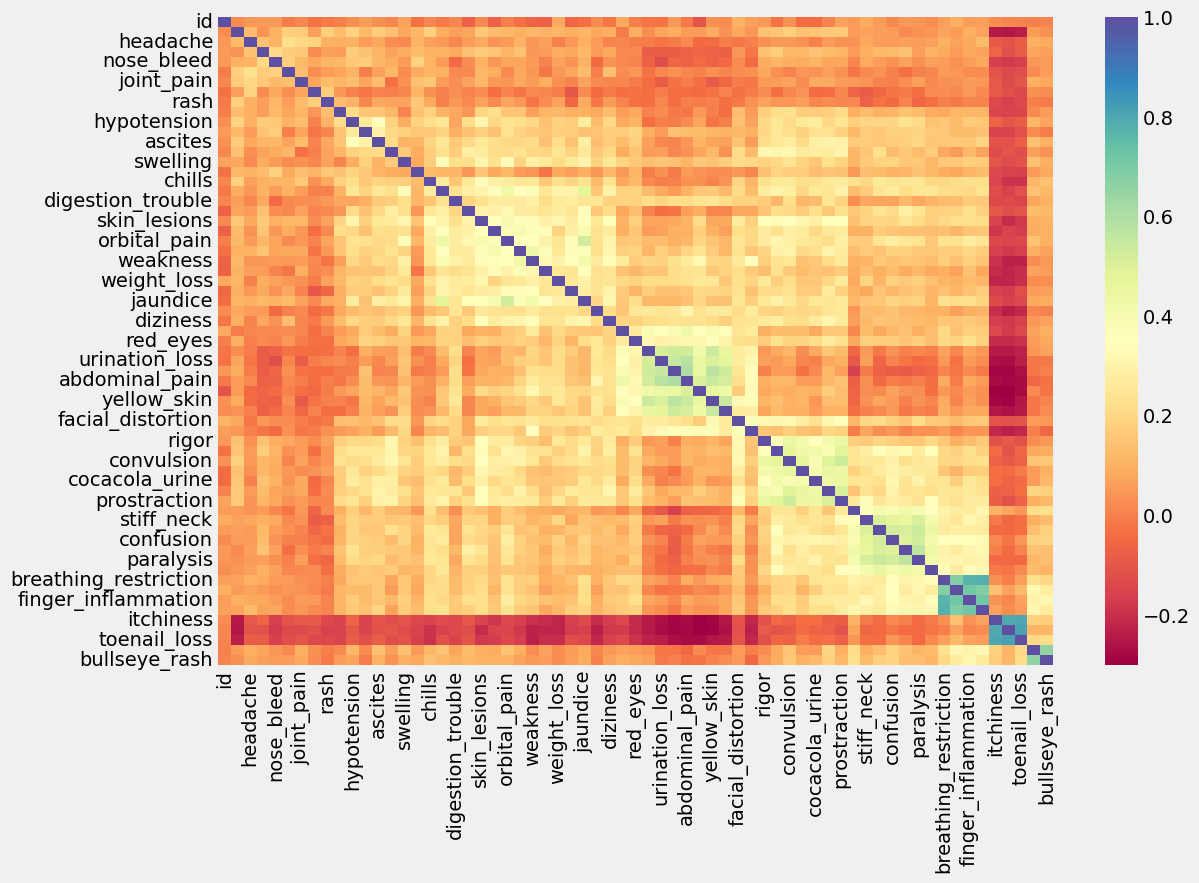

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



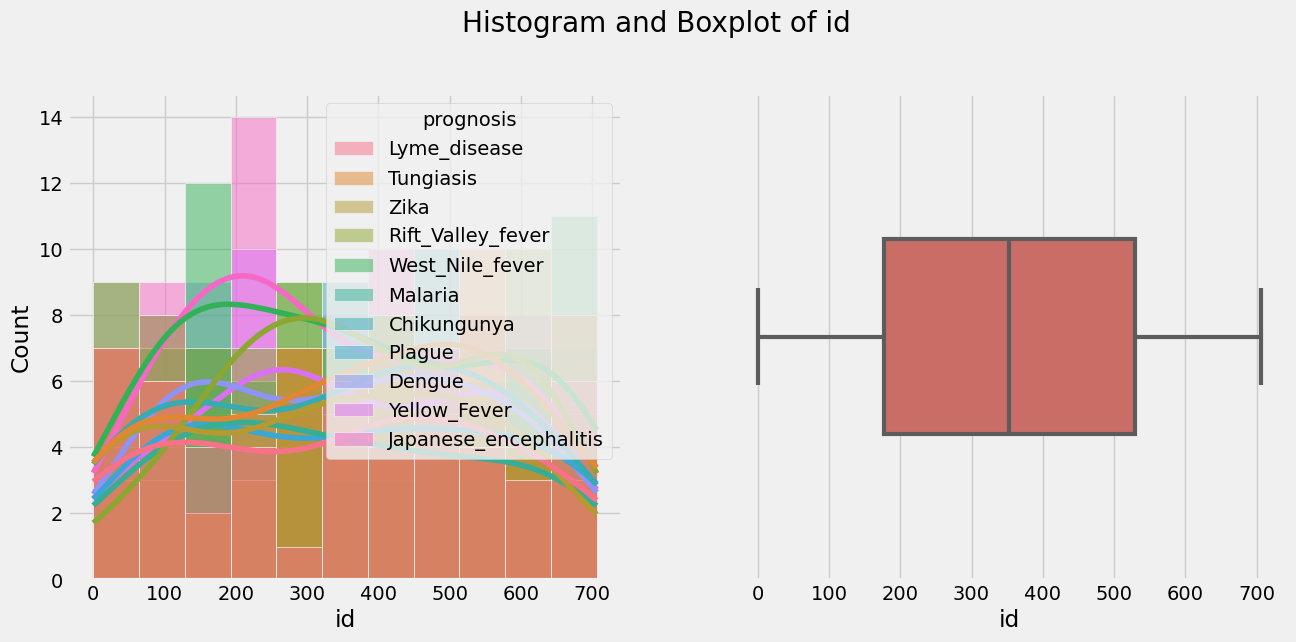

----------------------------------------------------------------------------------------------------
Countplot(s):



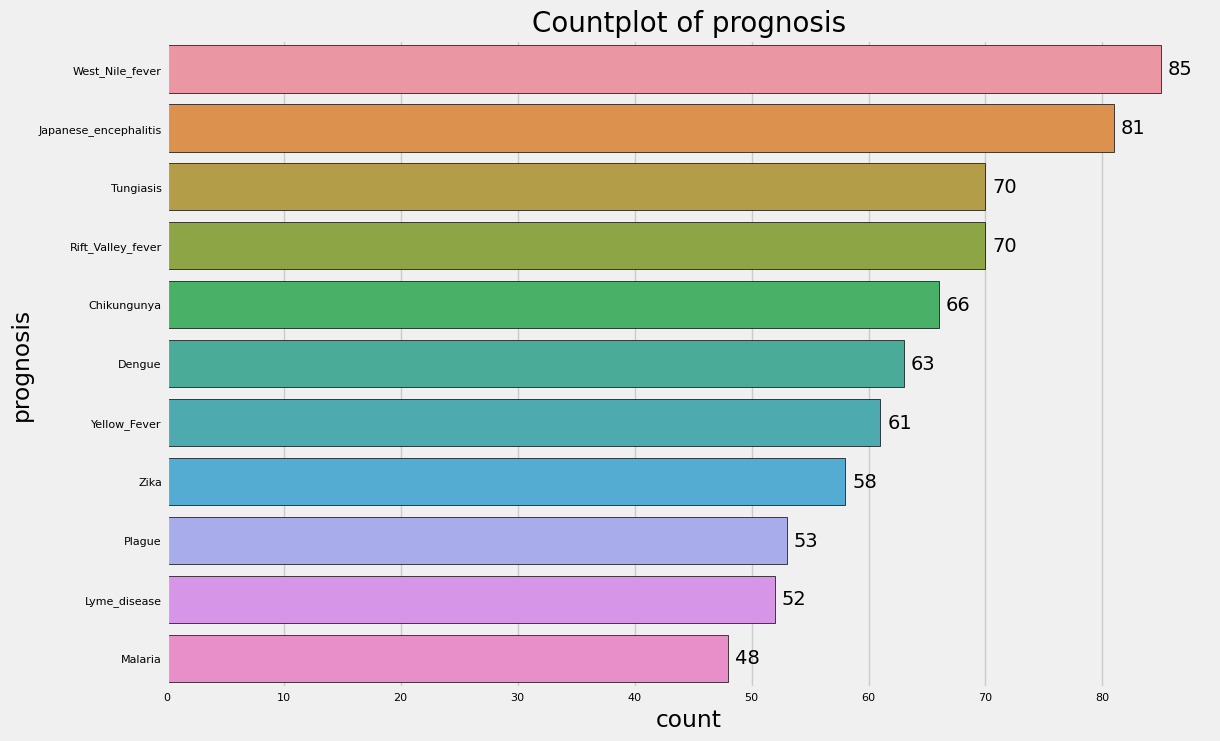

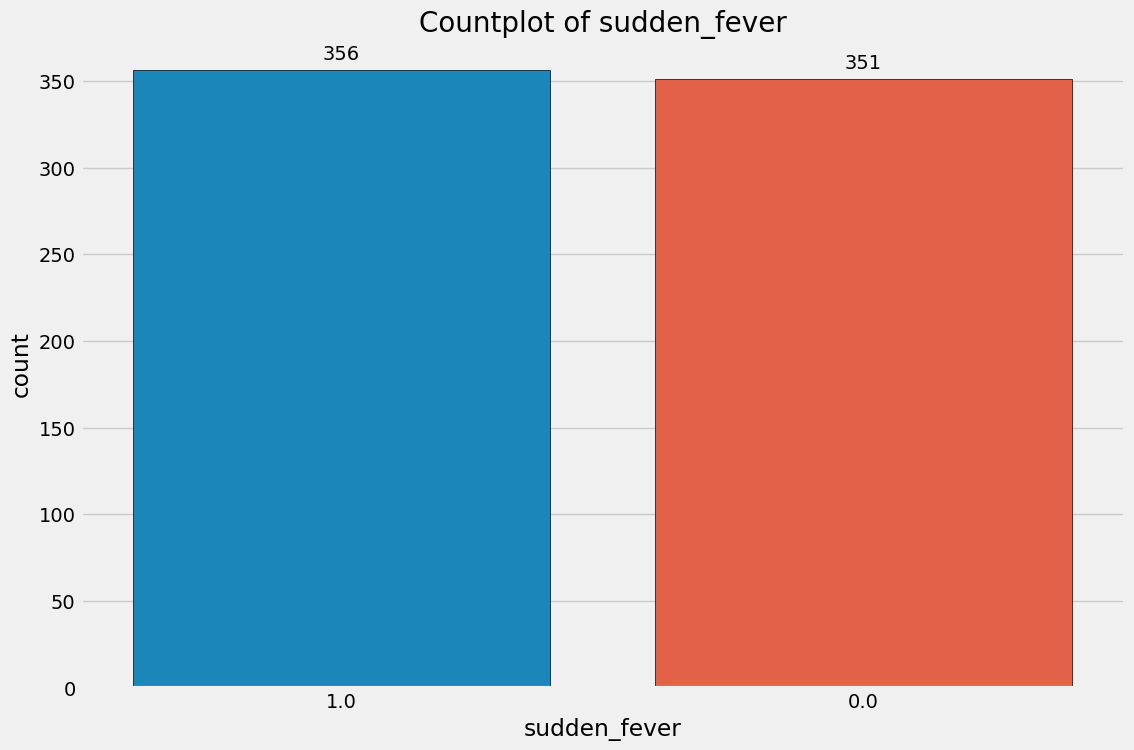

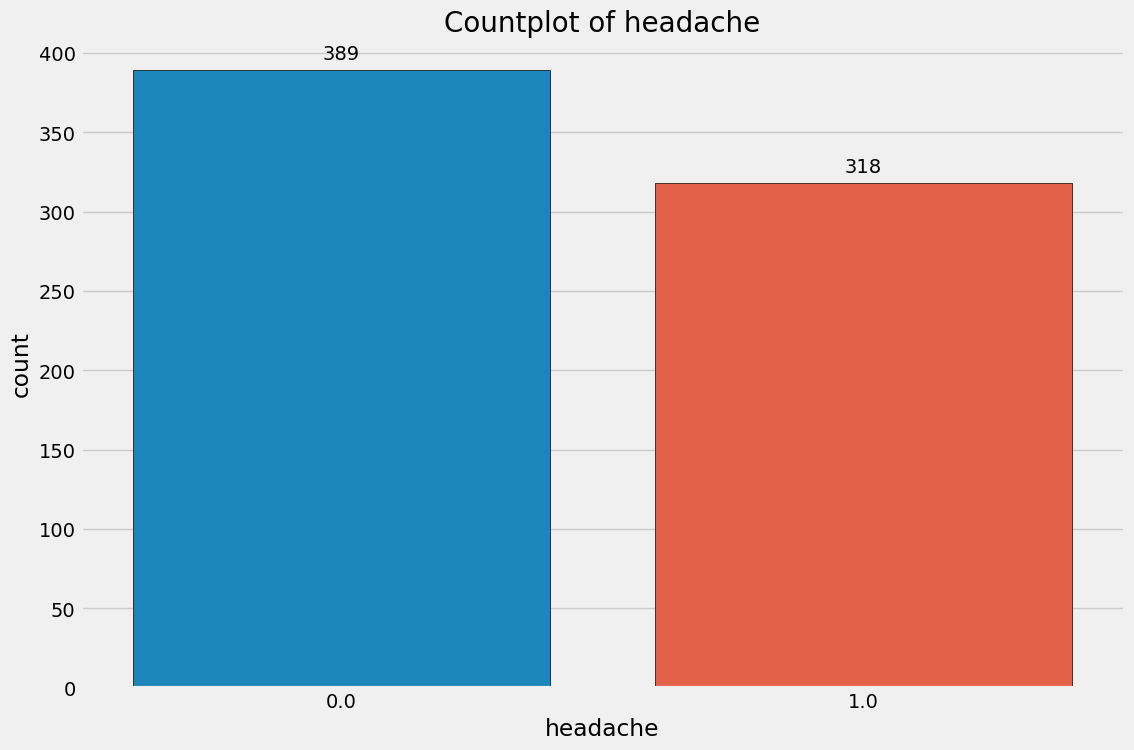

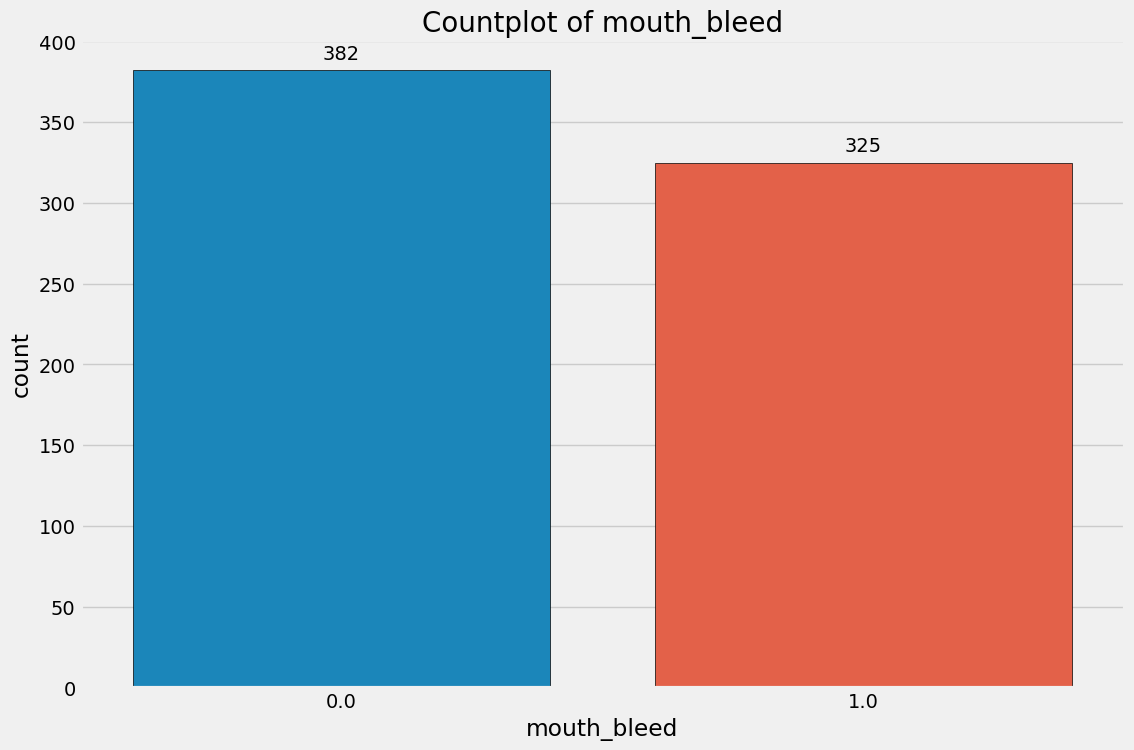

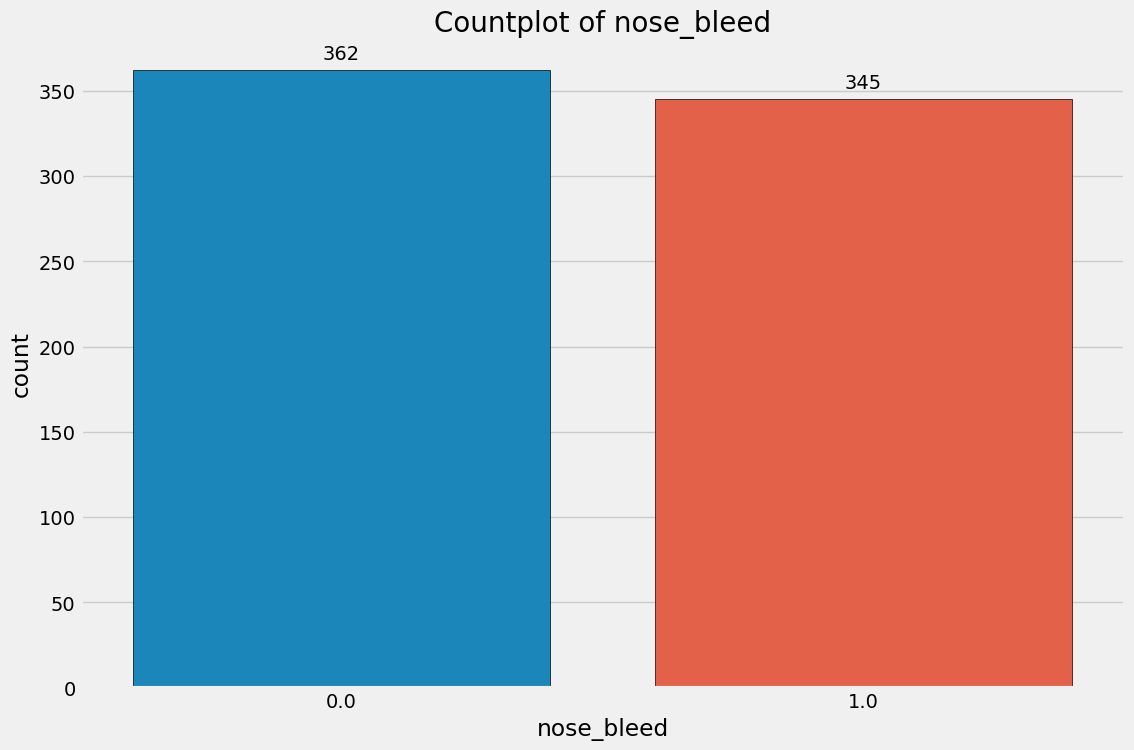

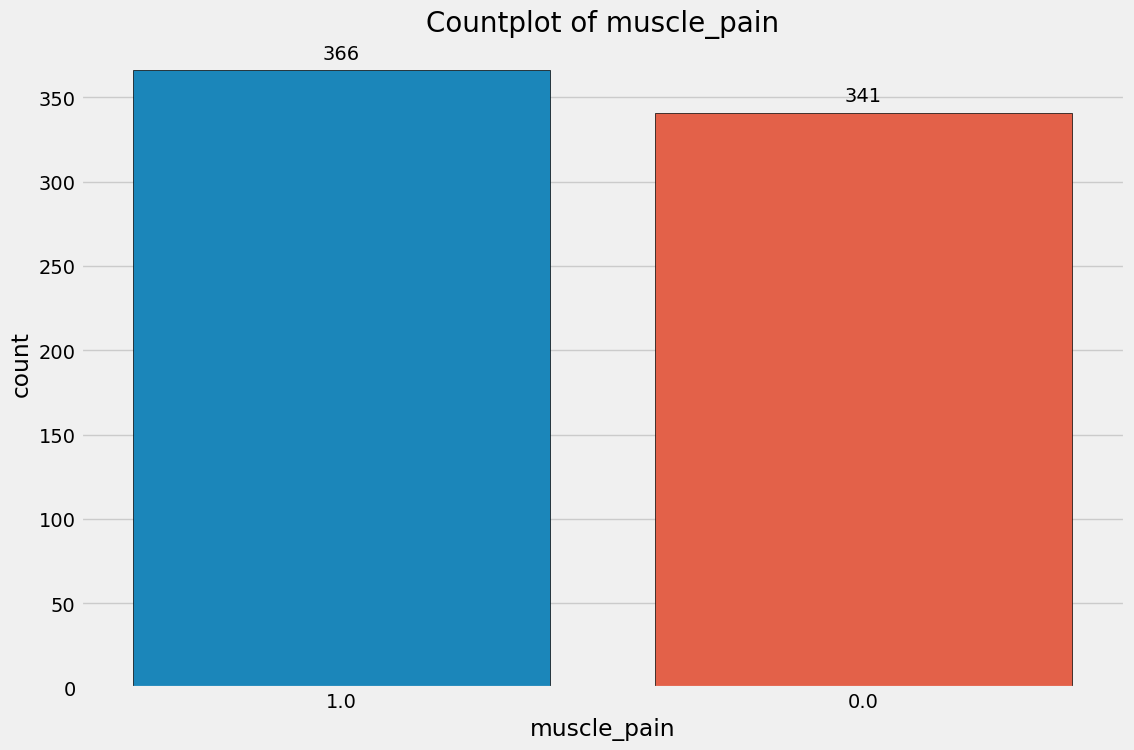

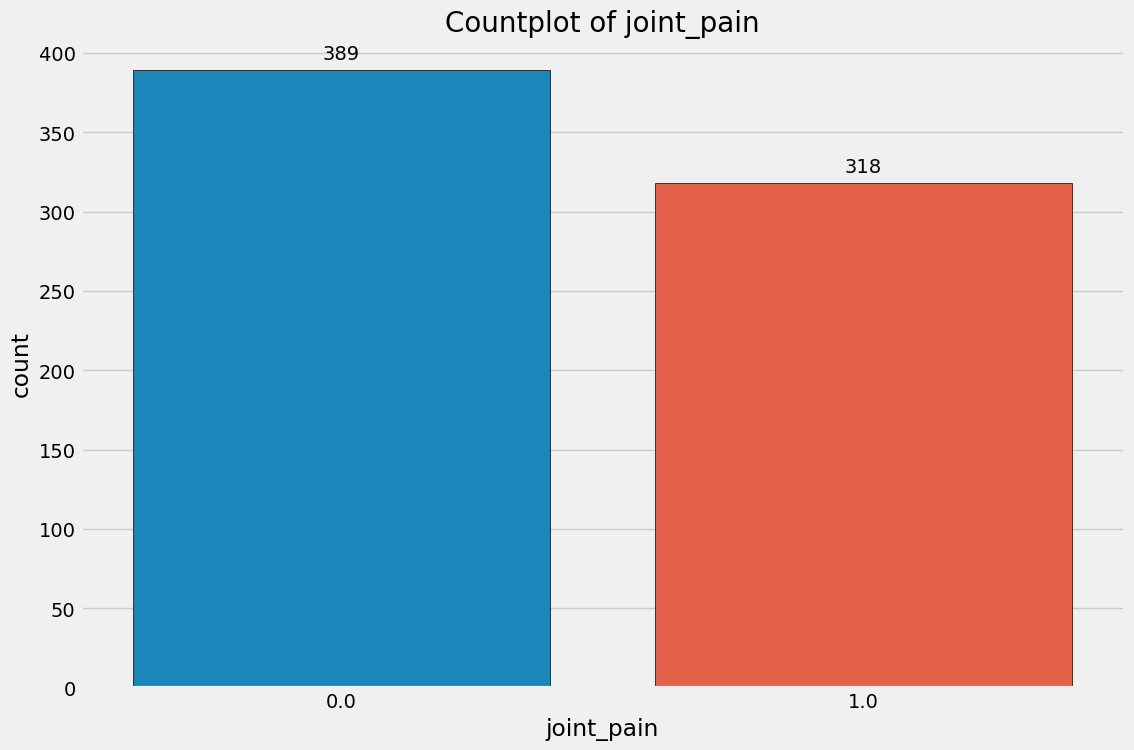

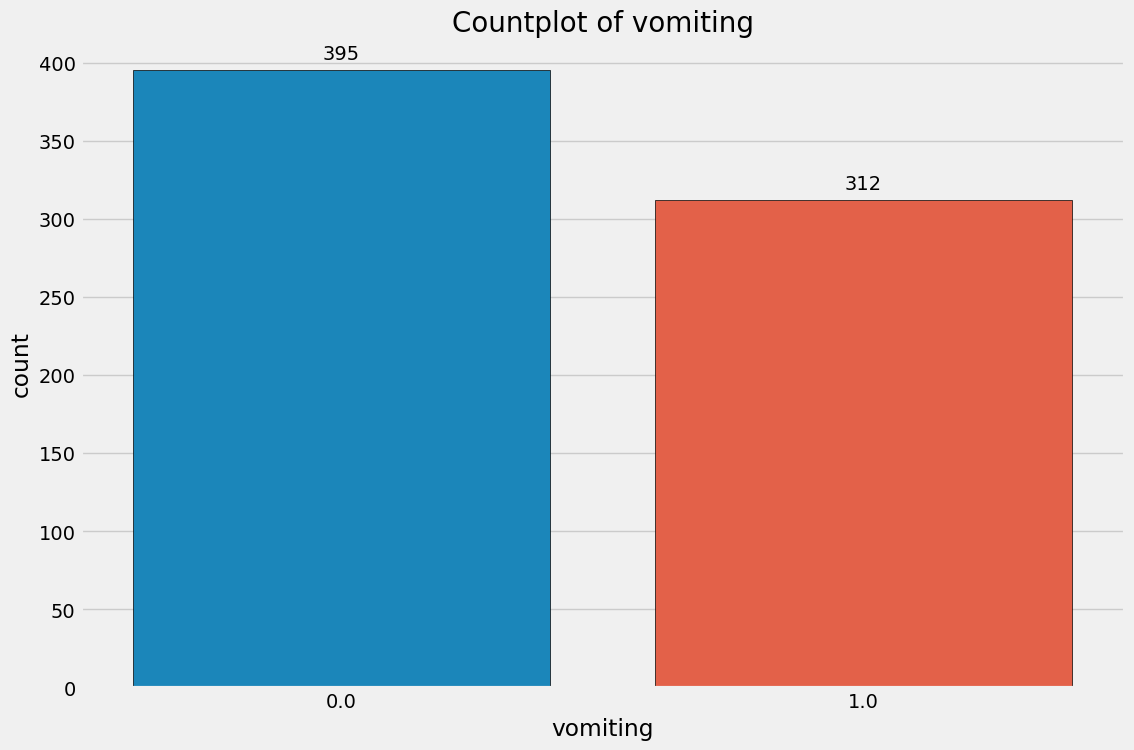

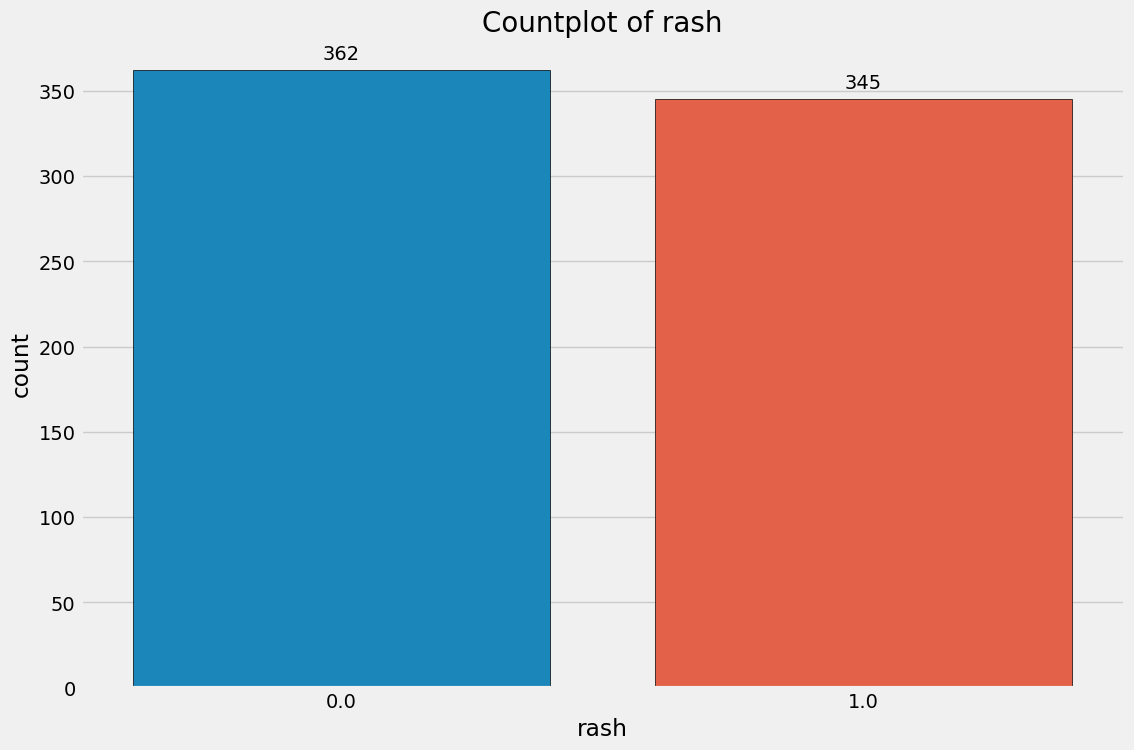

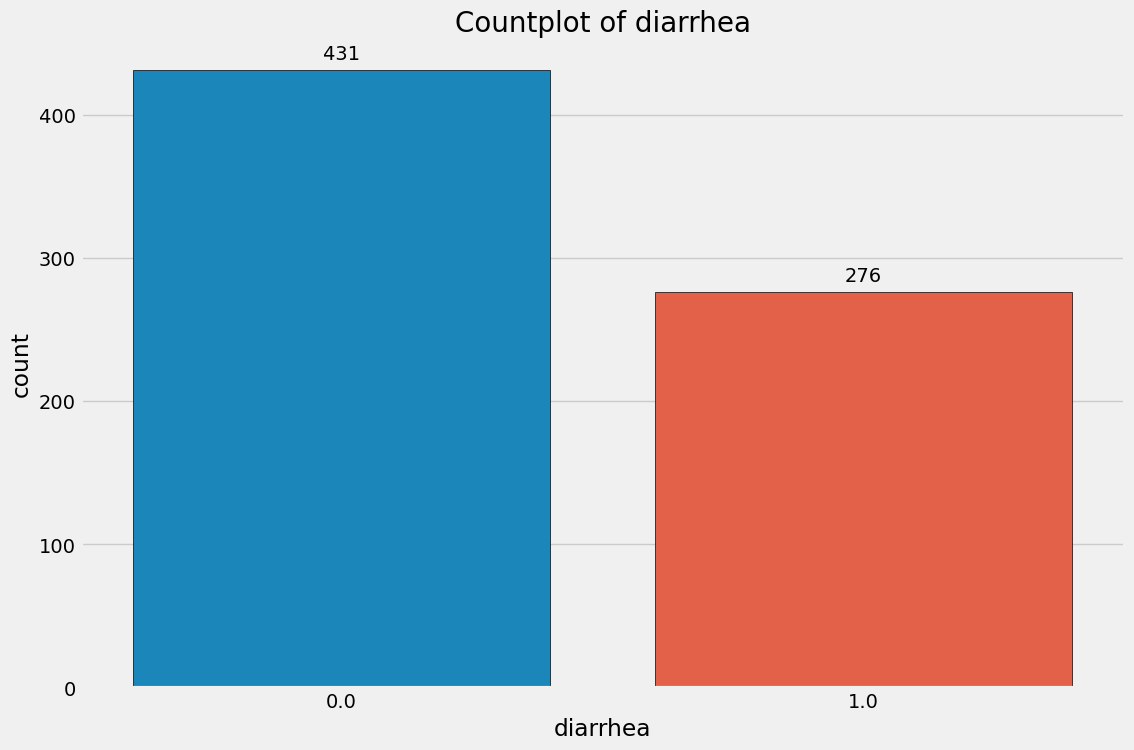

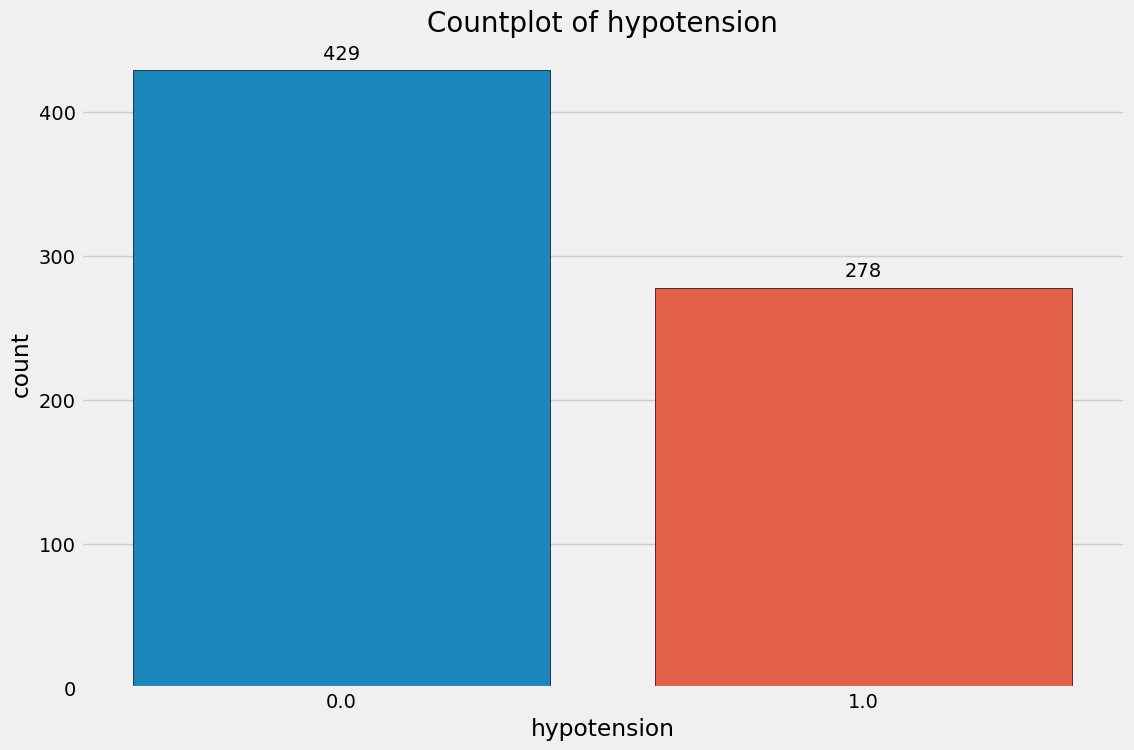

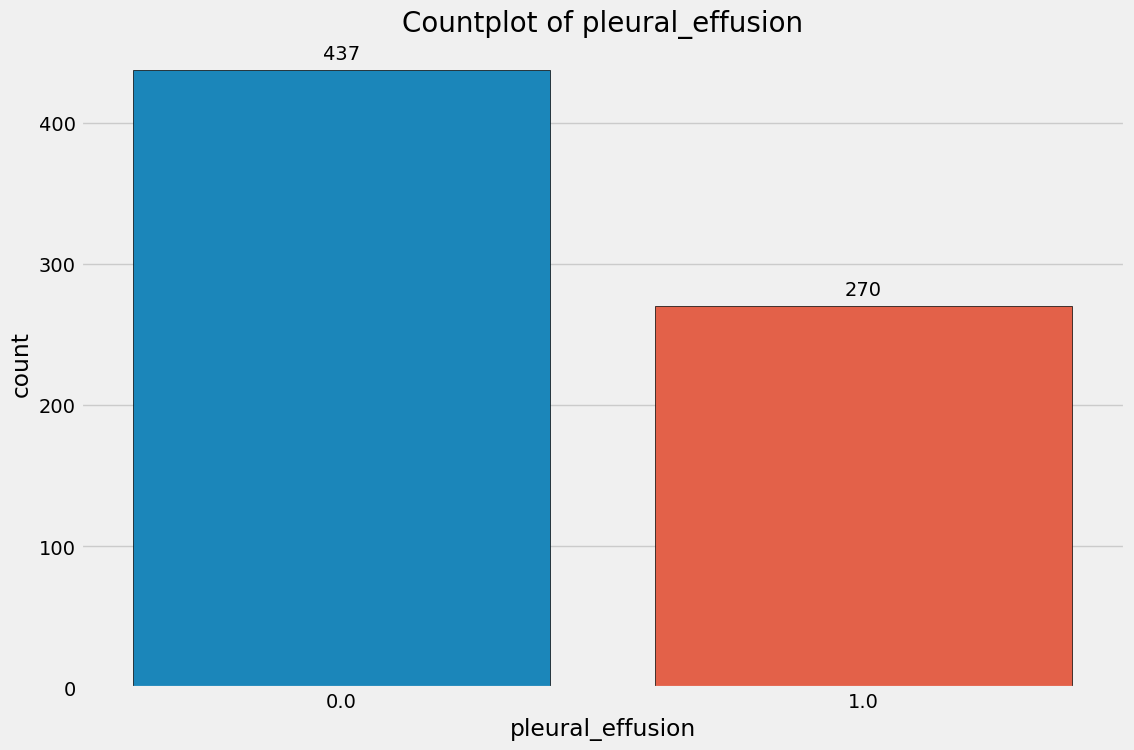

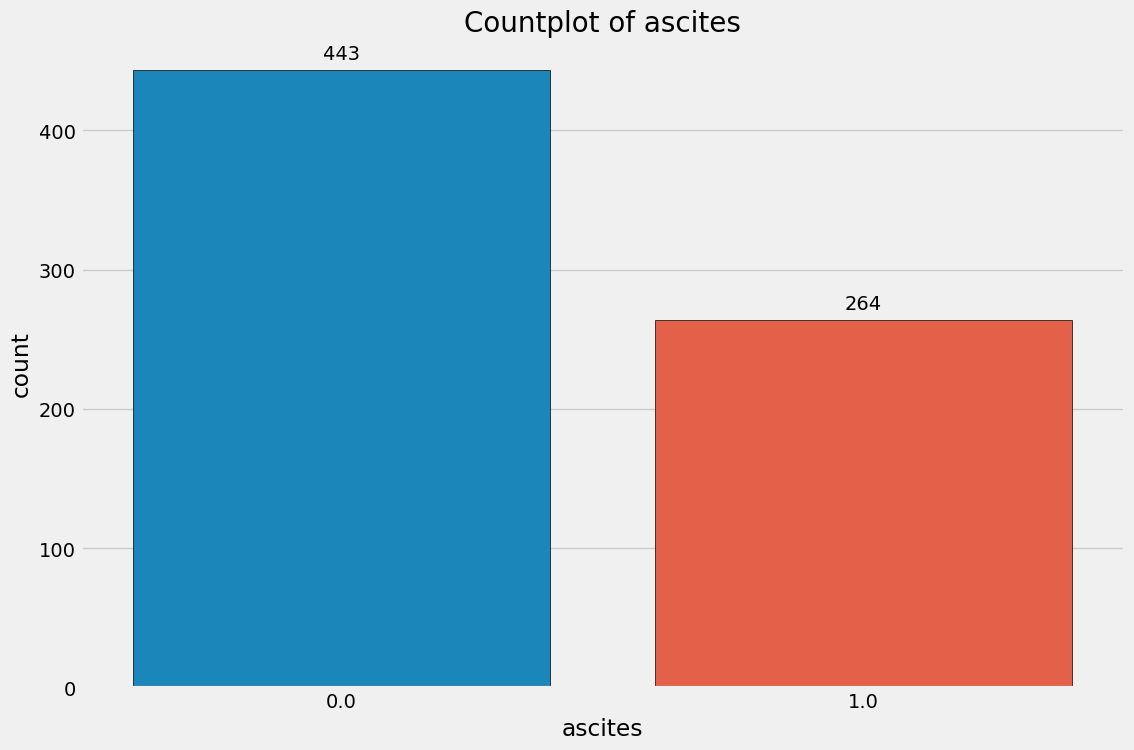

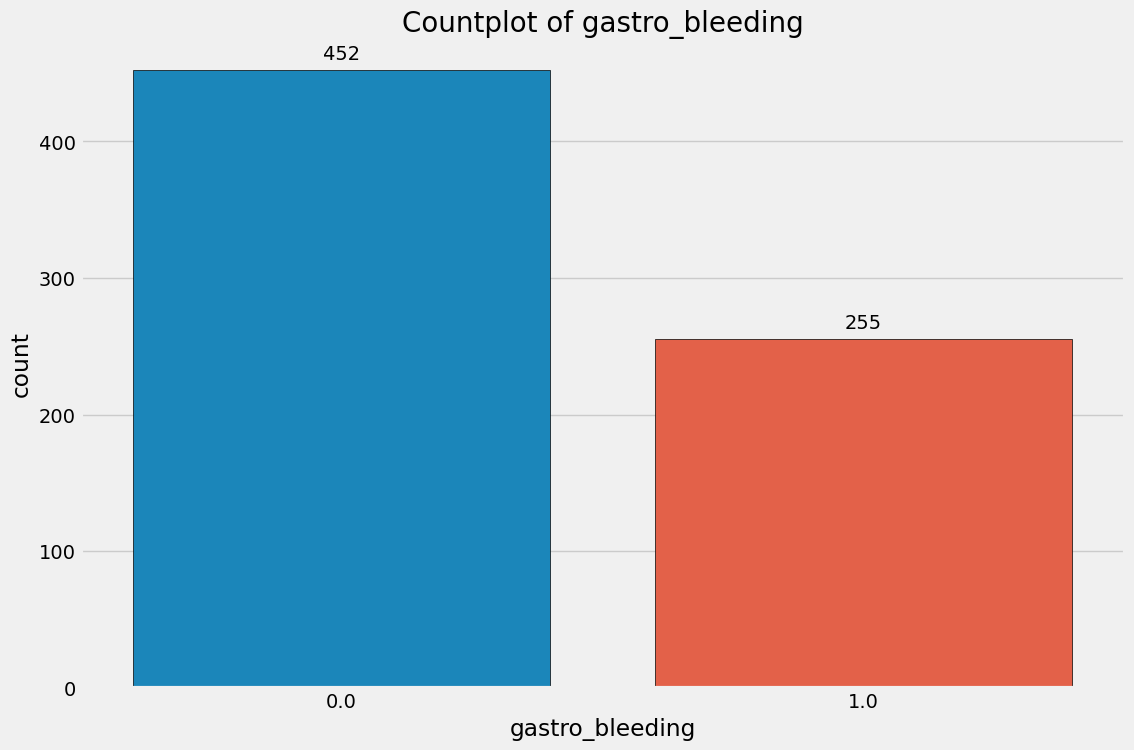

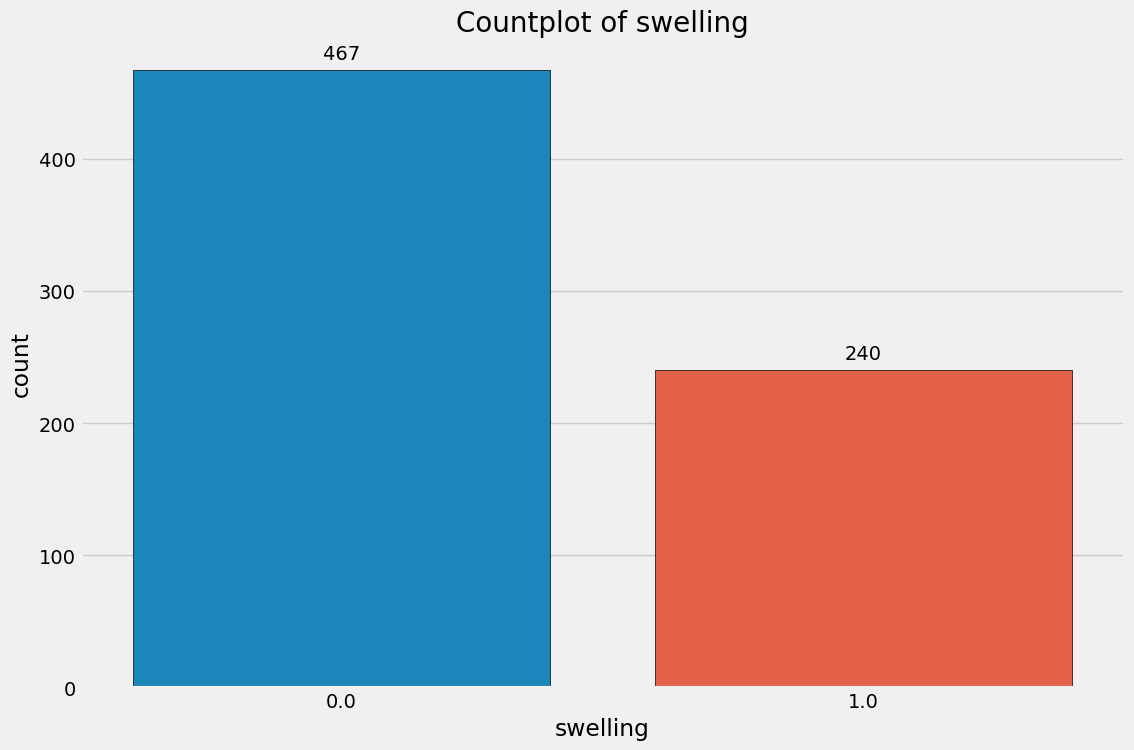

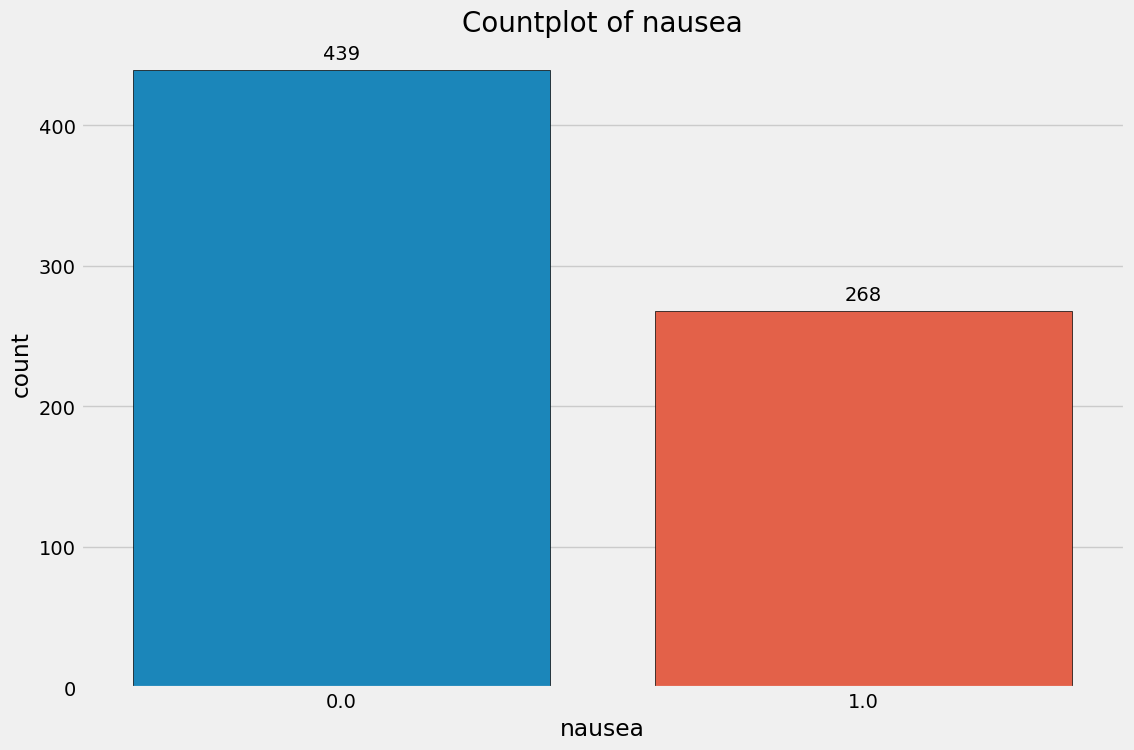

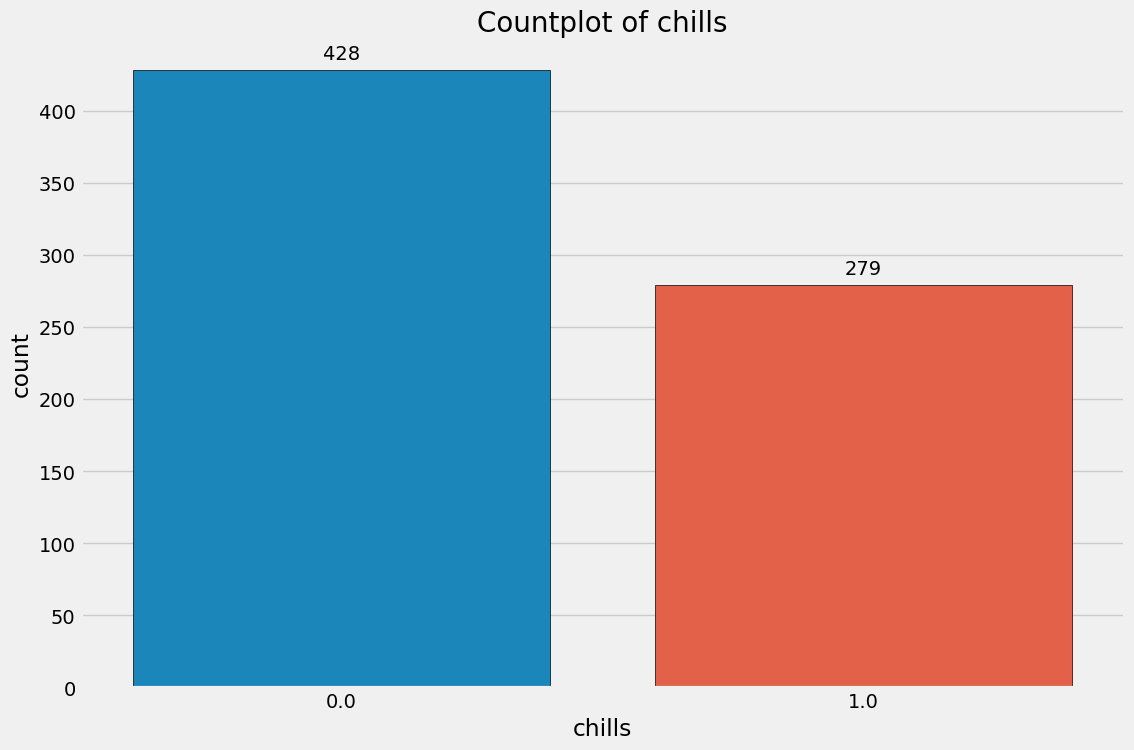

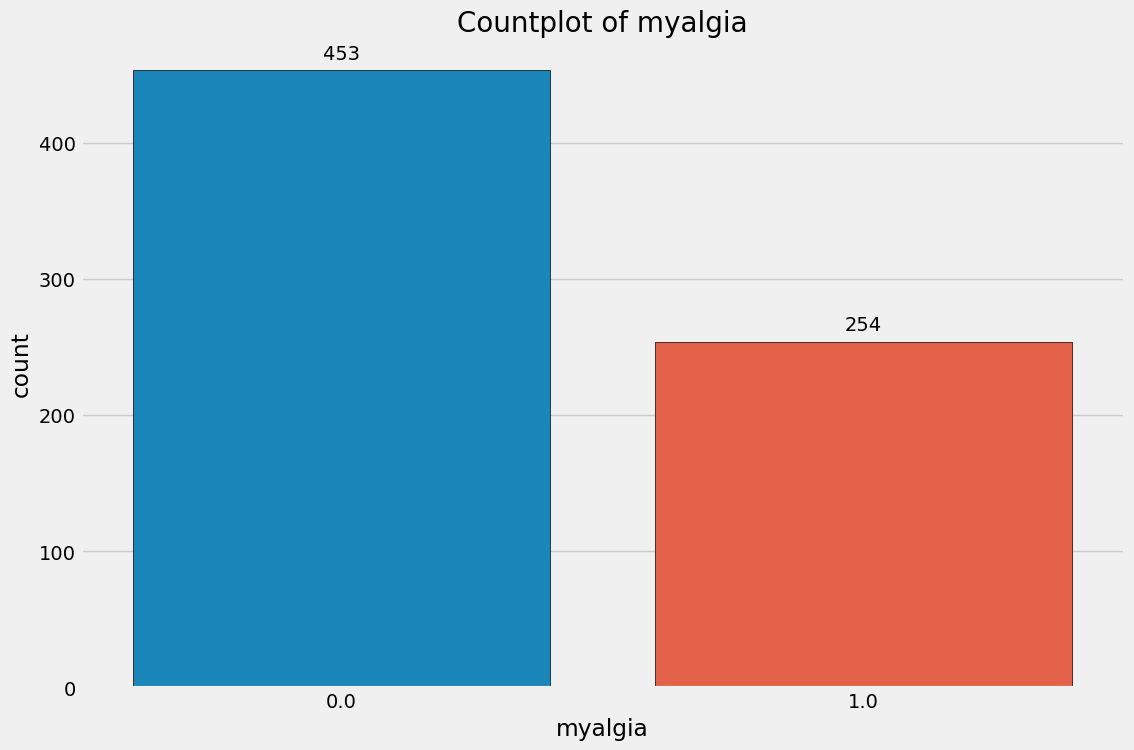

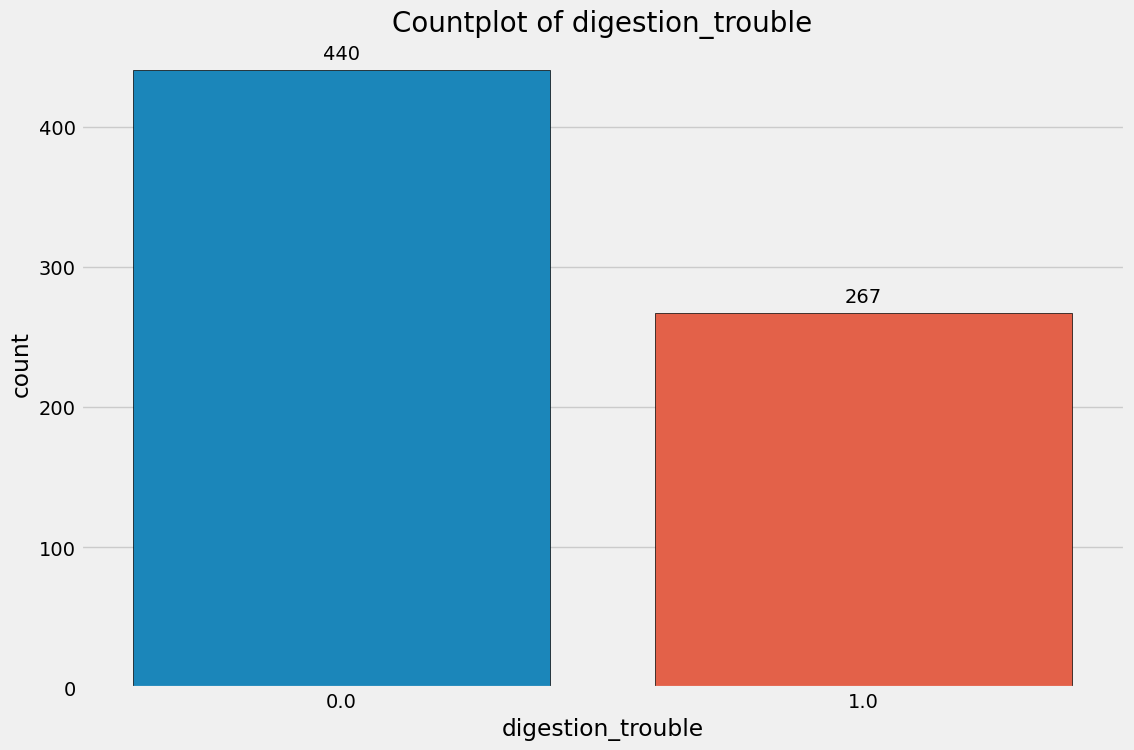

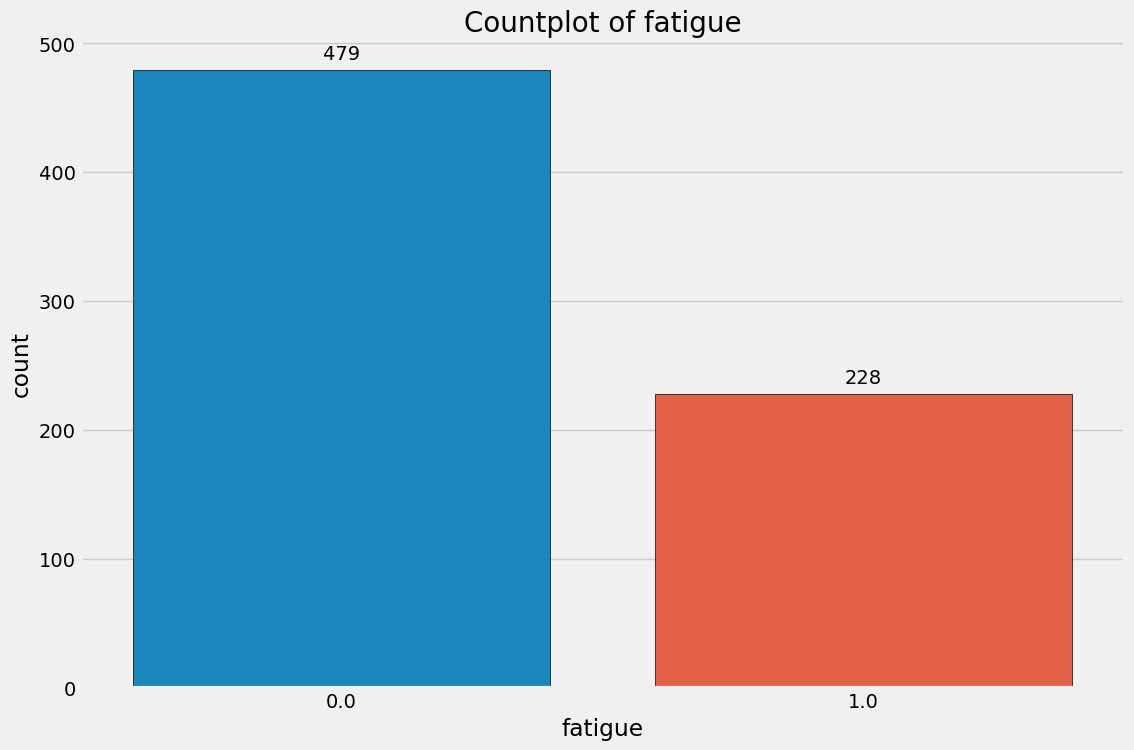

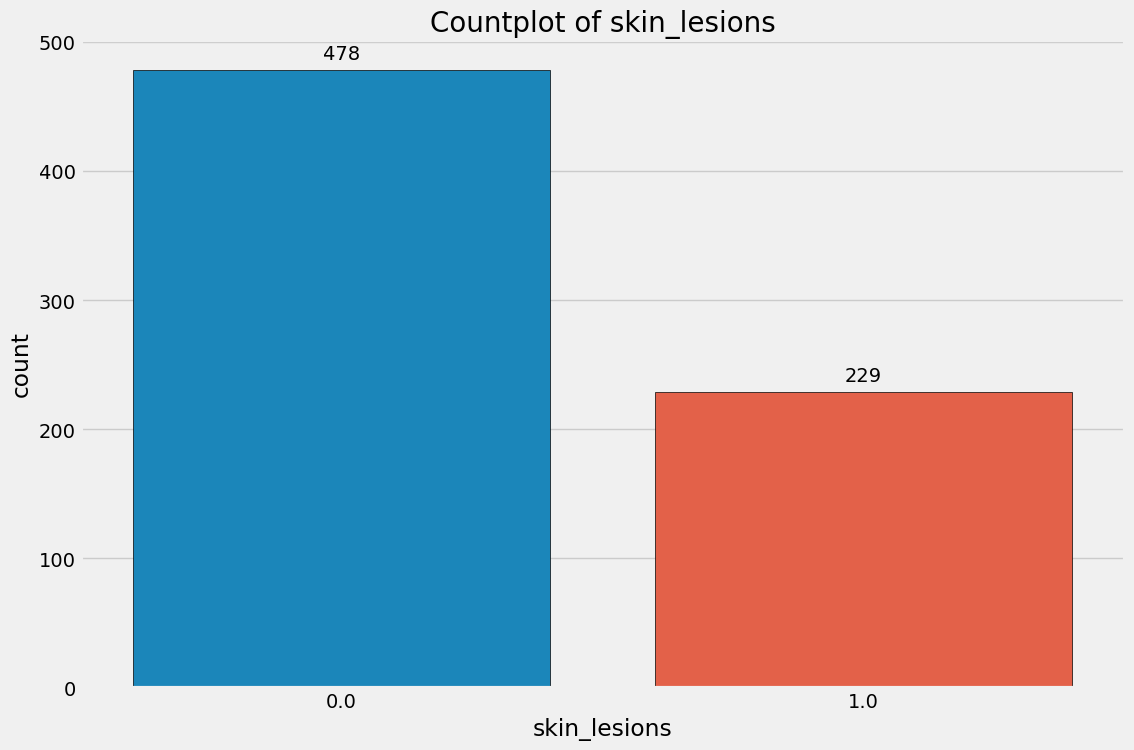

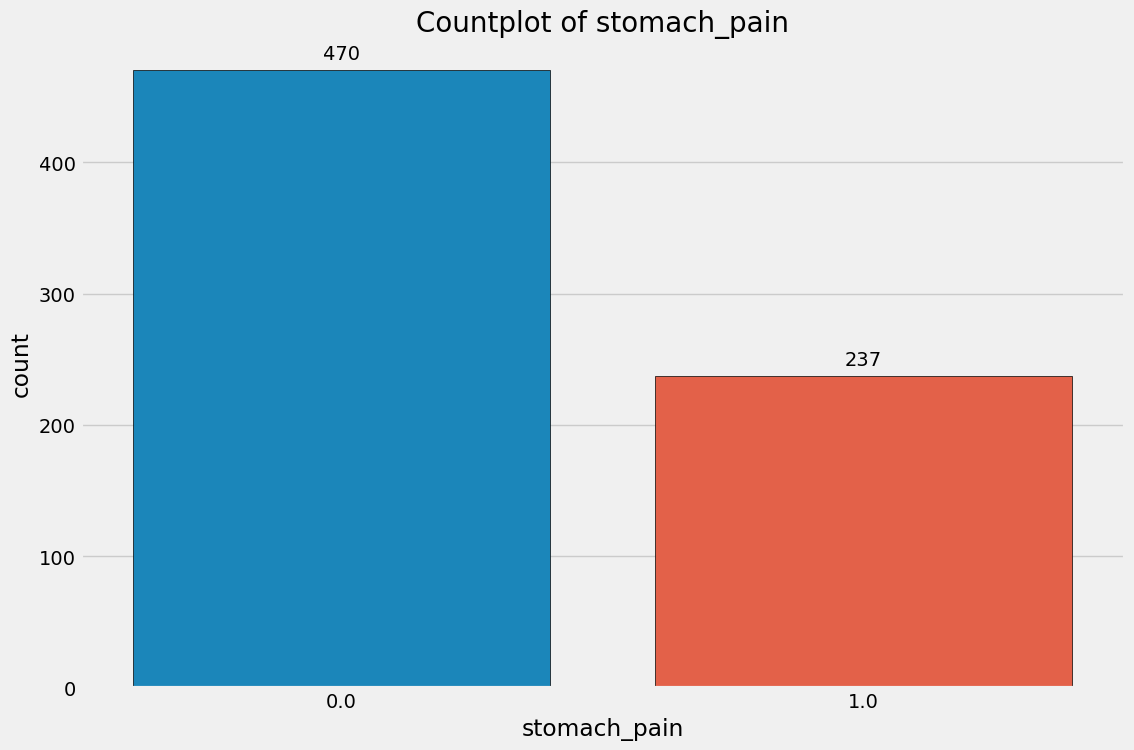

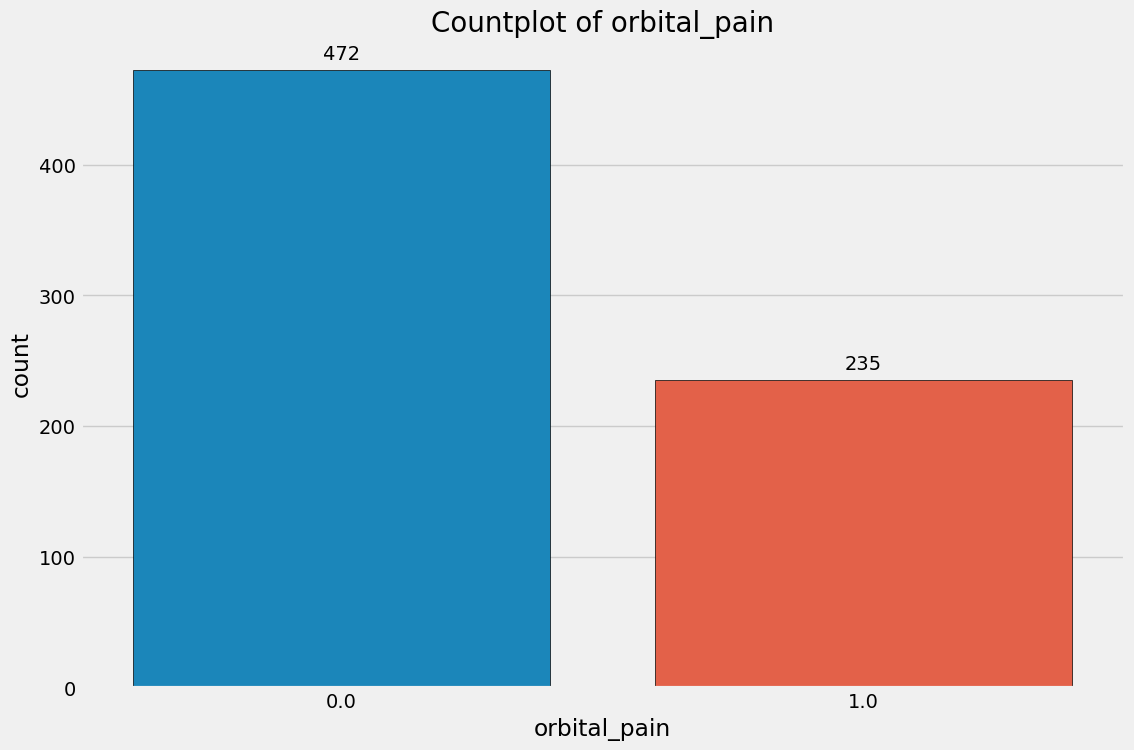

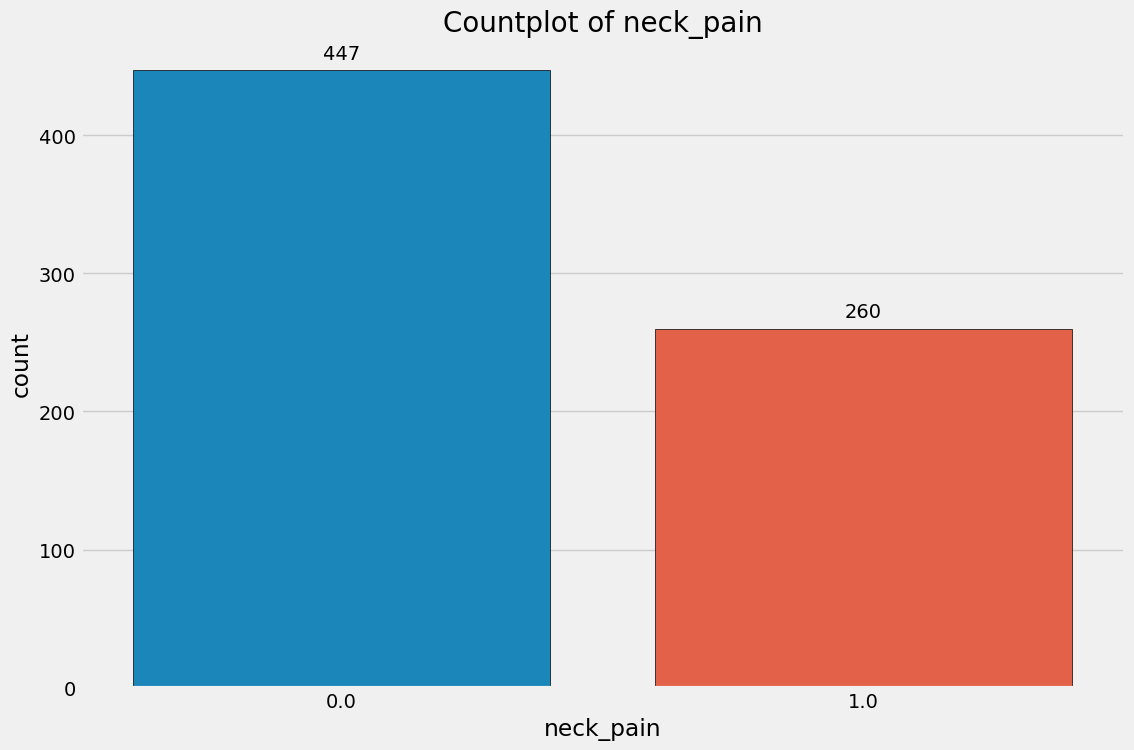

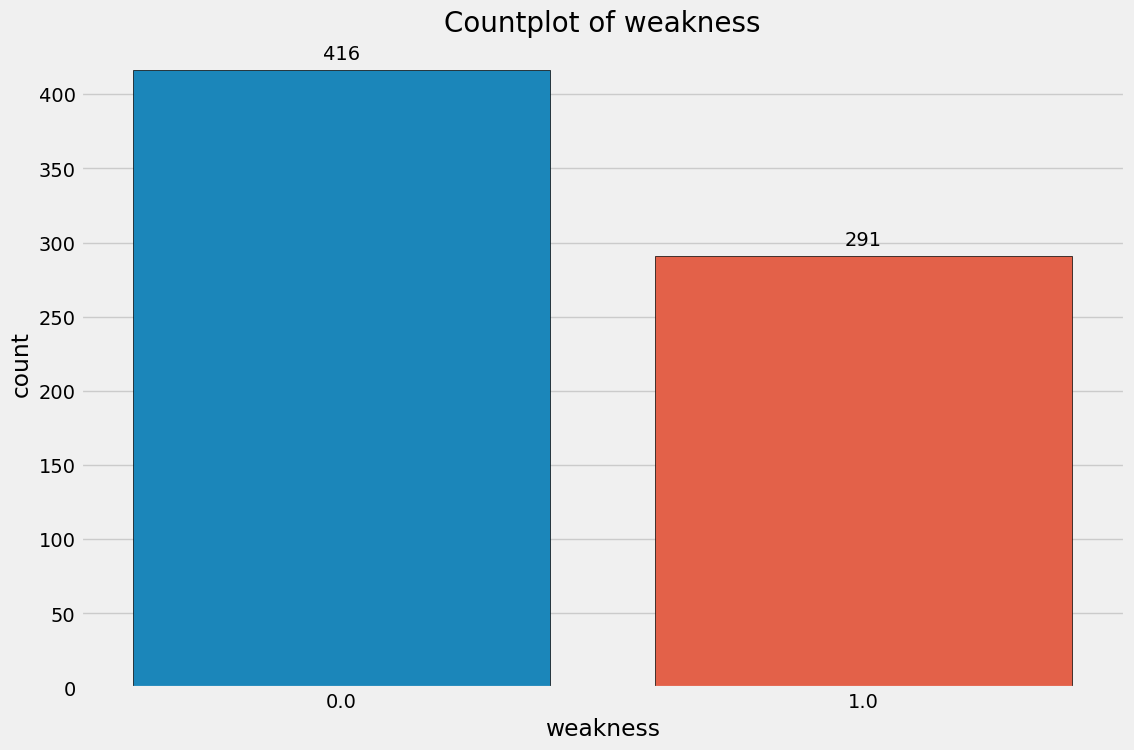

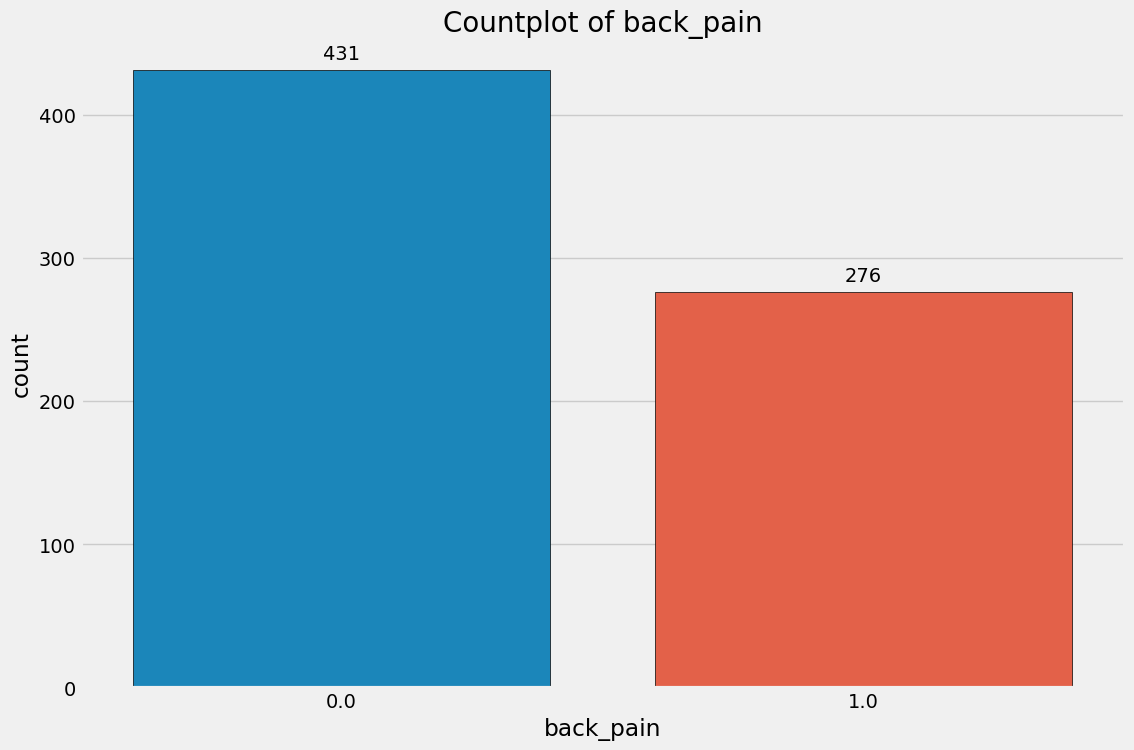

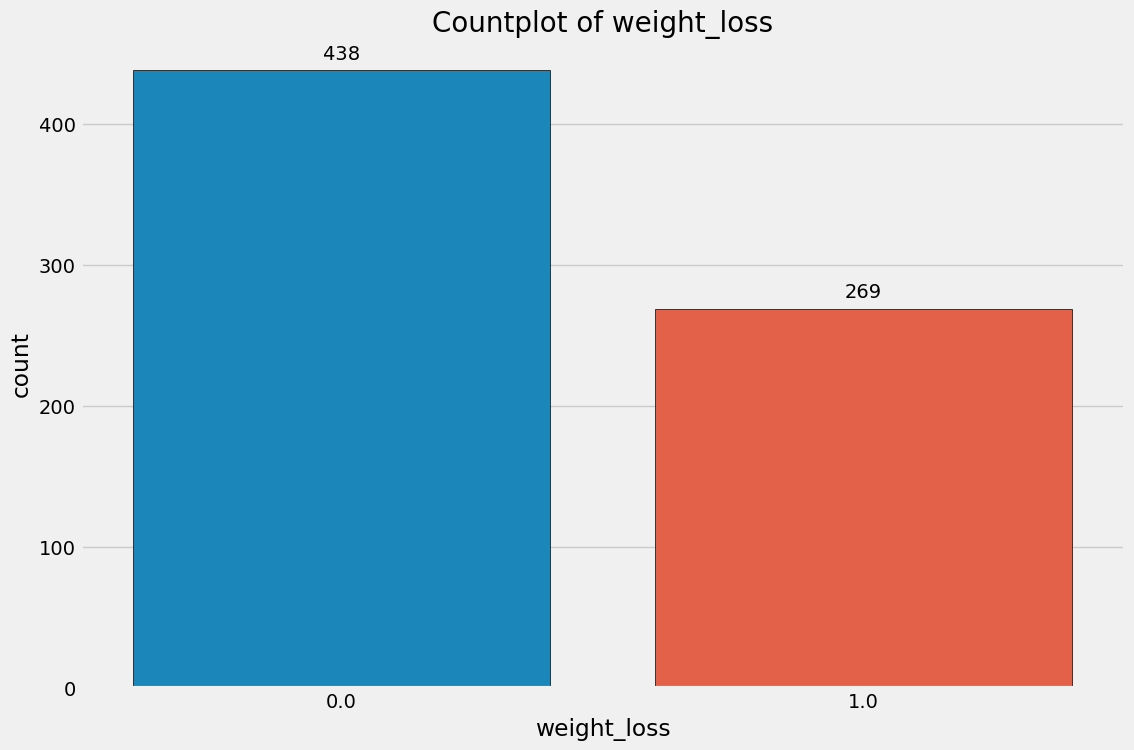

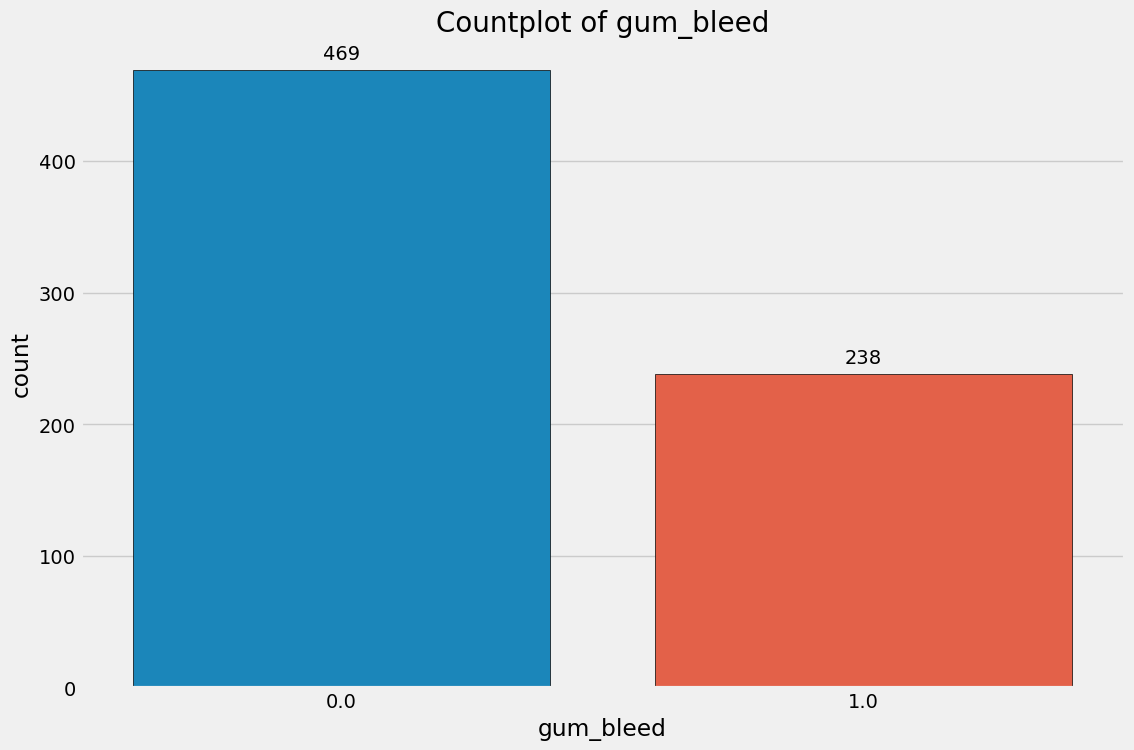

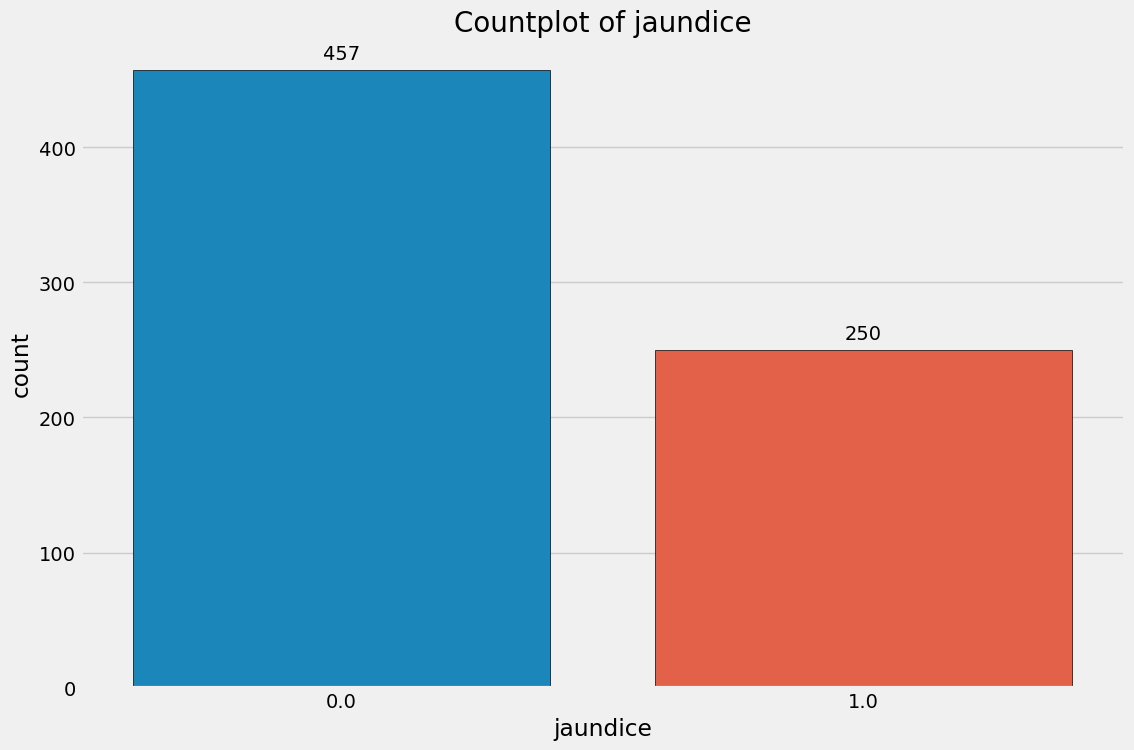

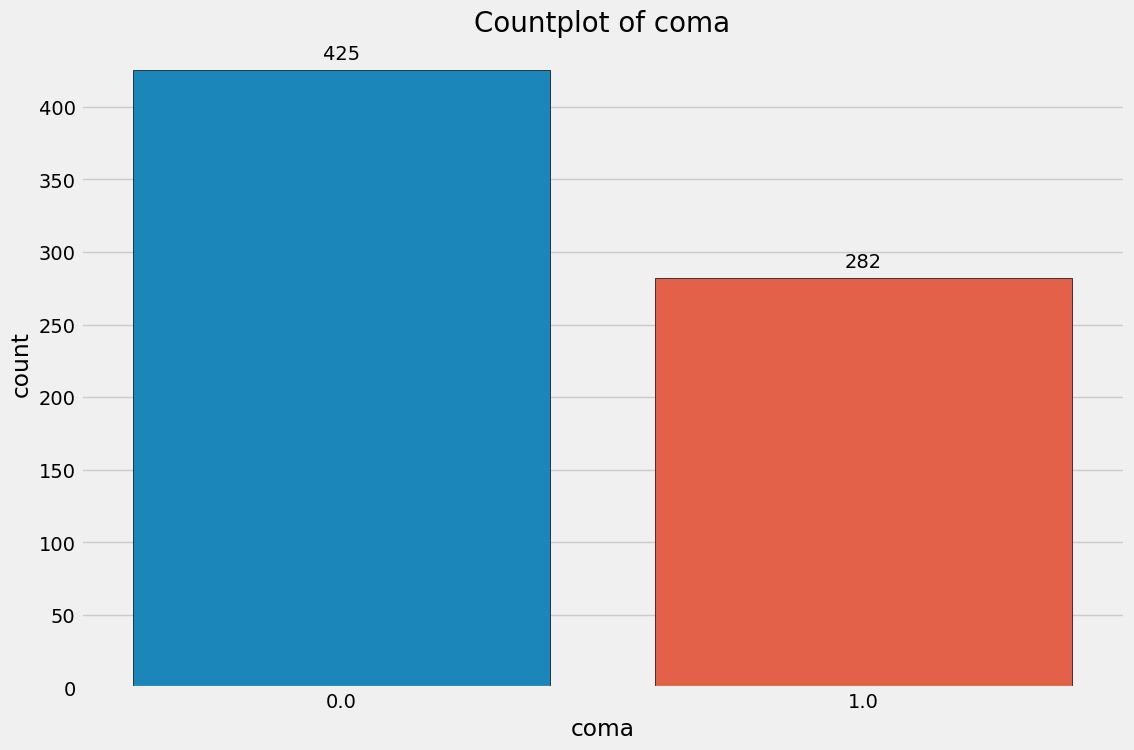

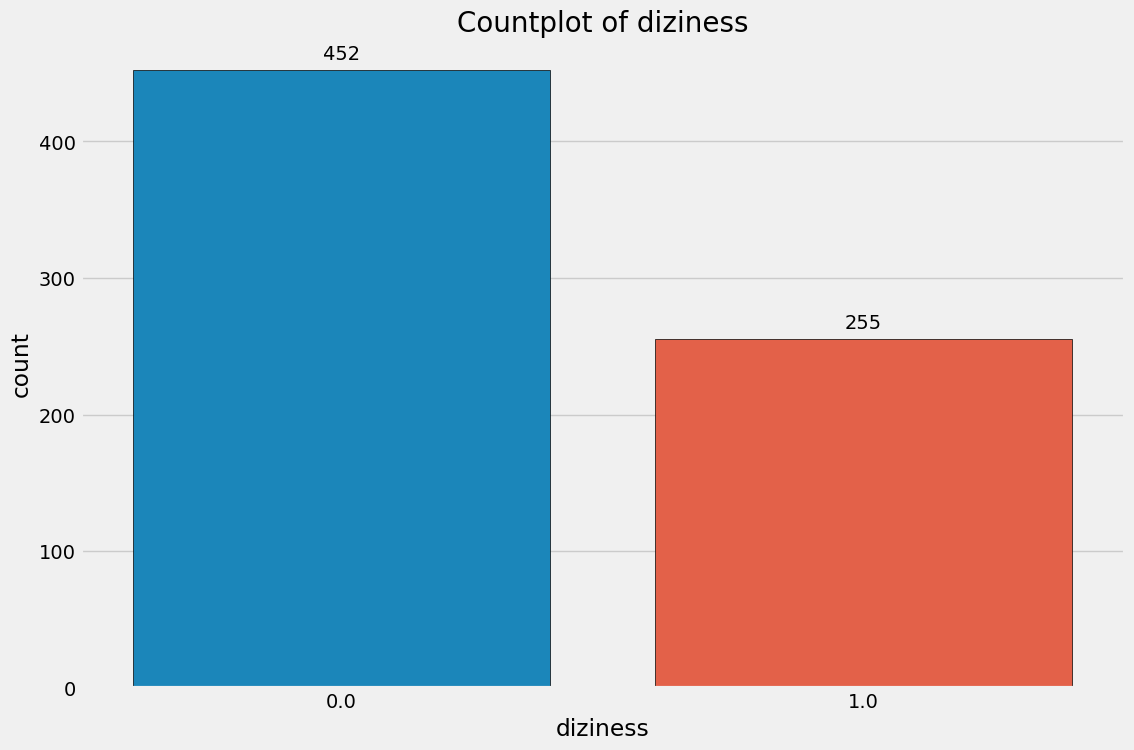

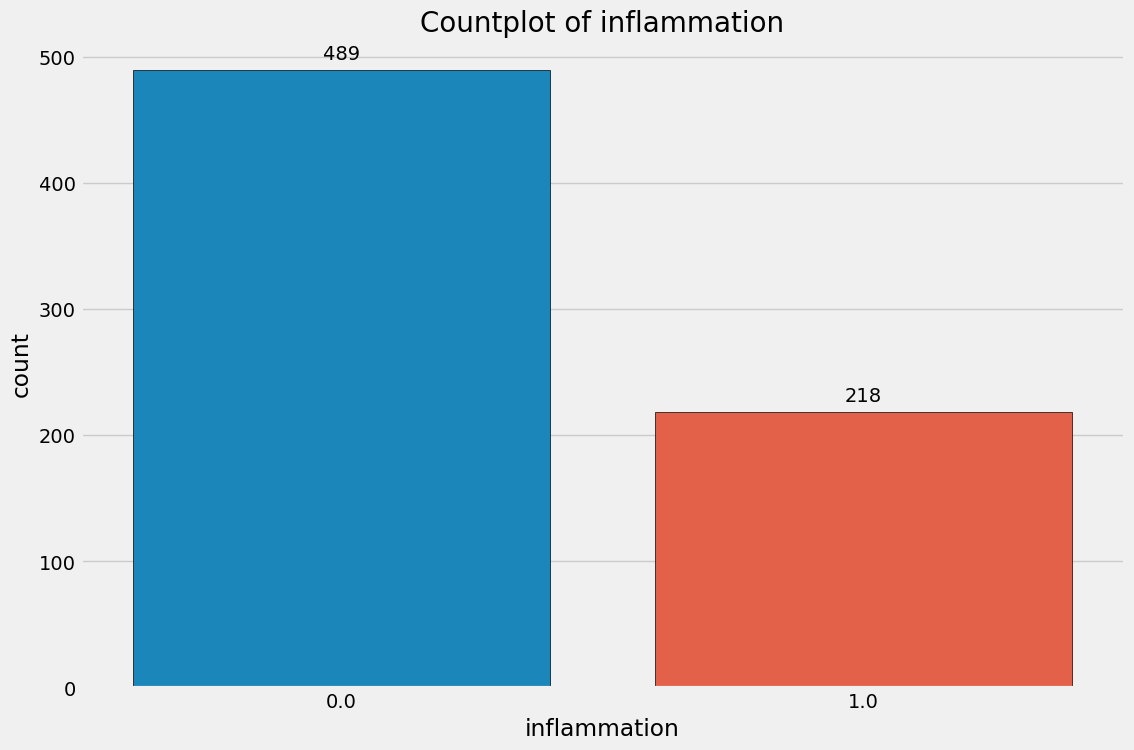

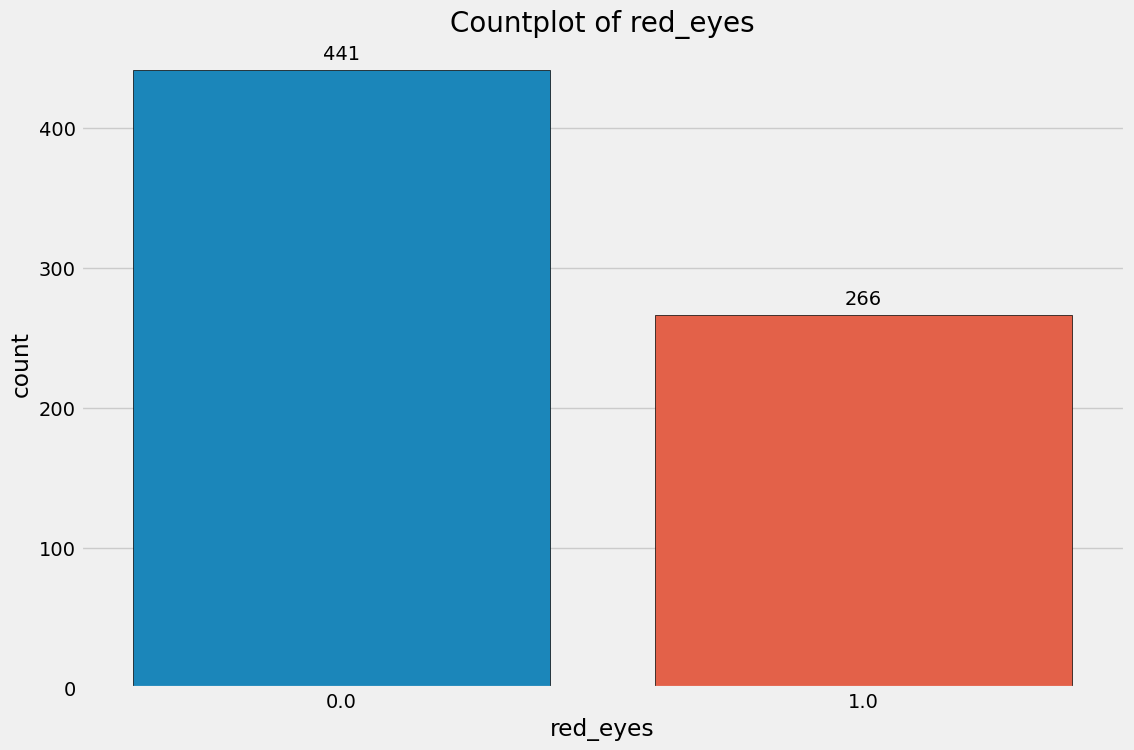

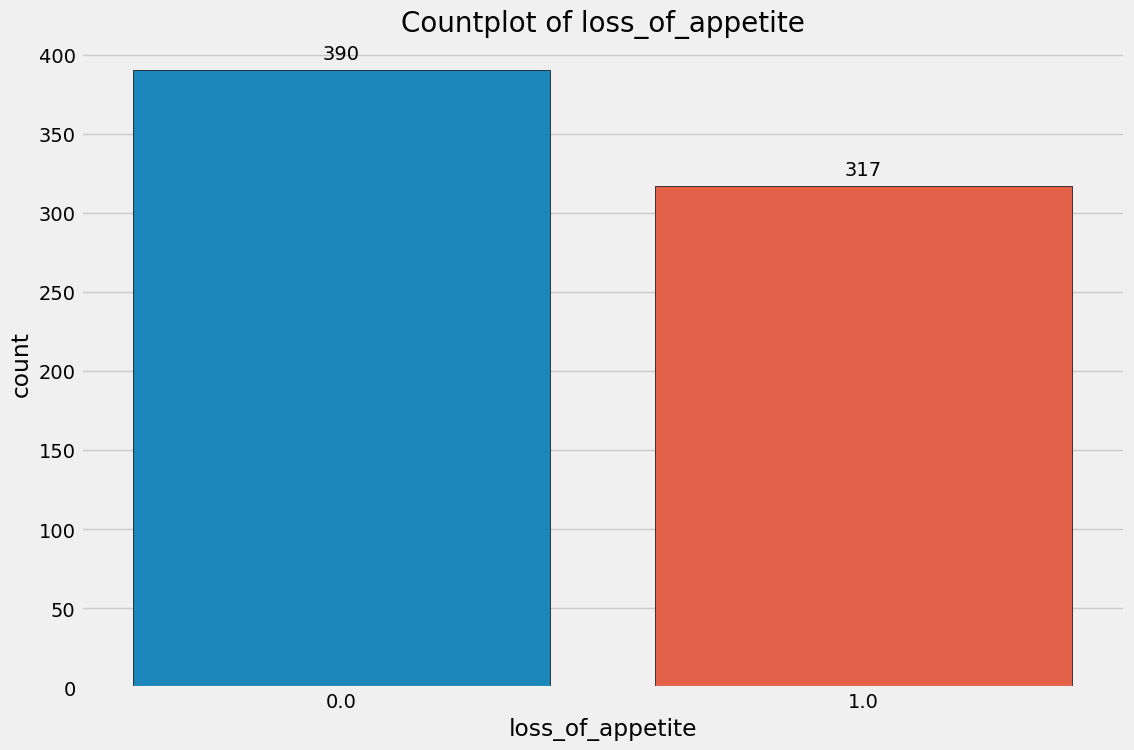

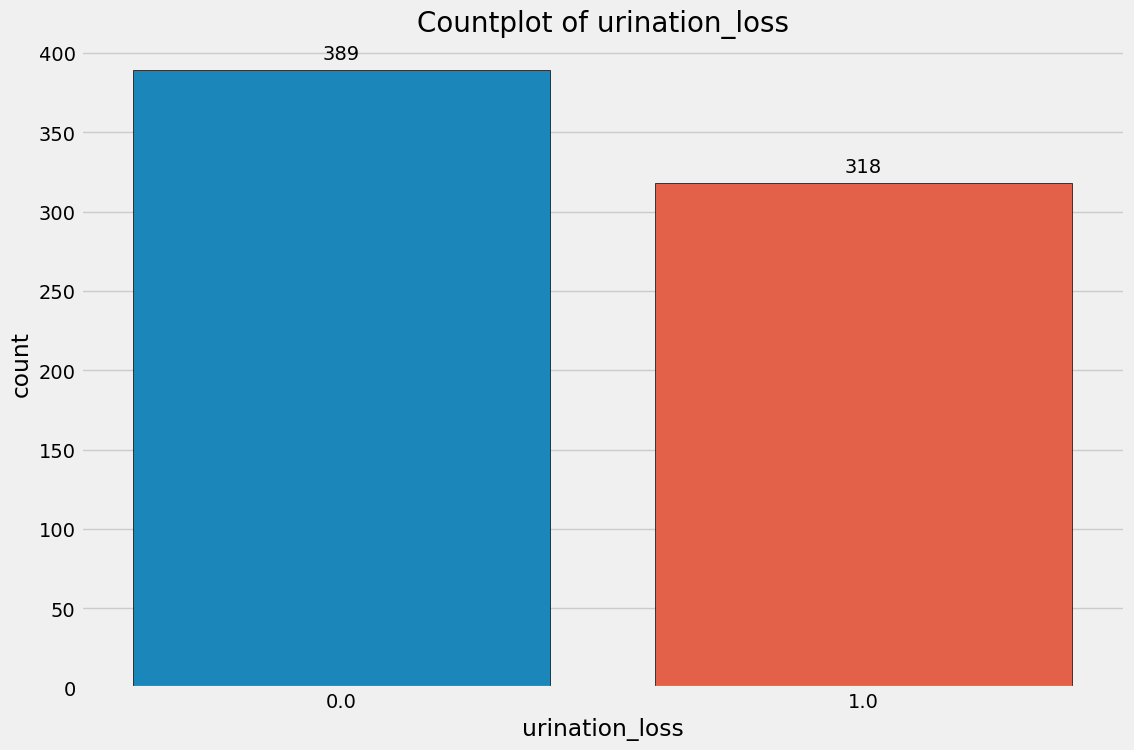

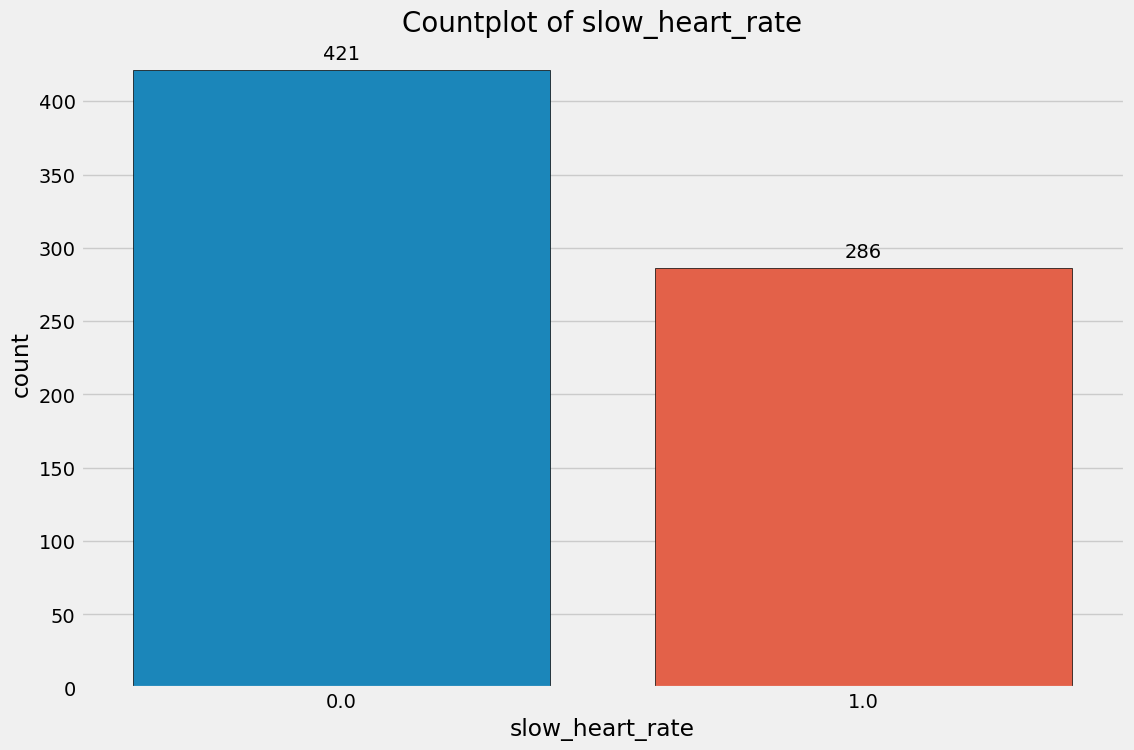

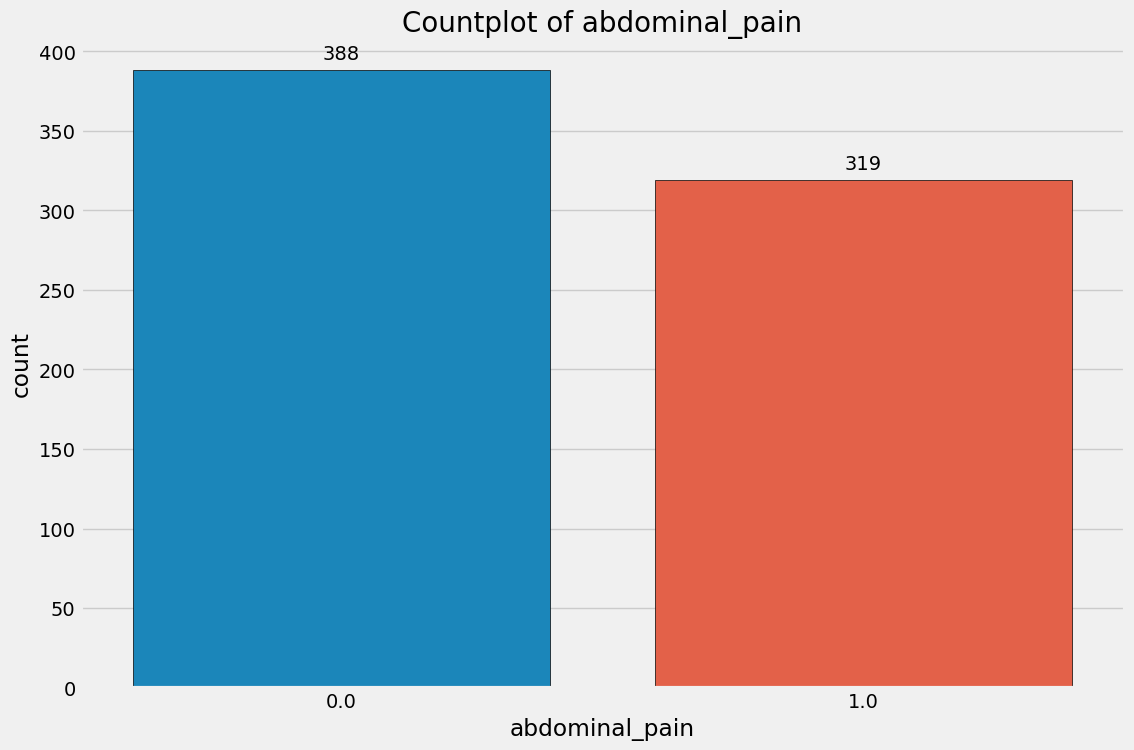

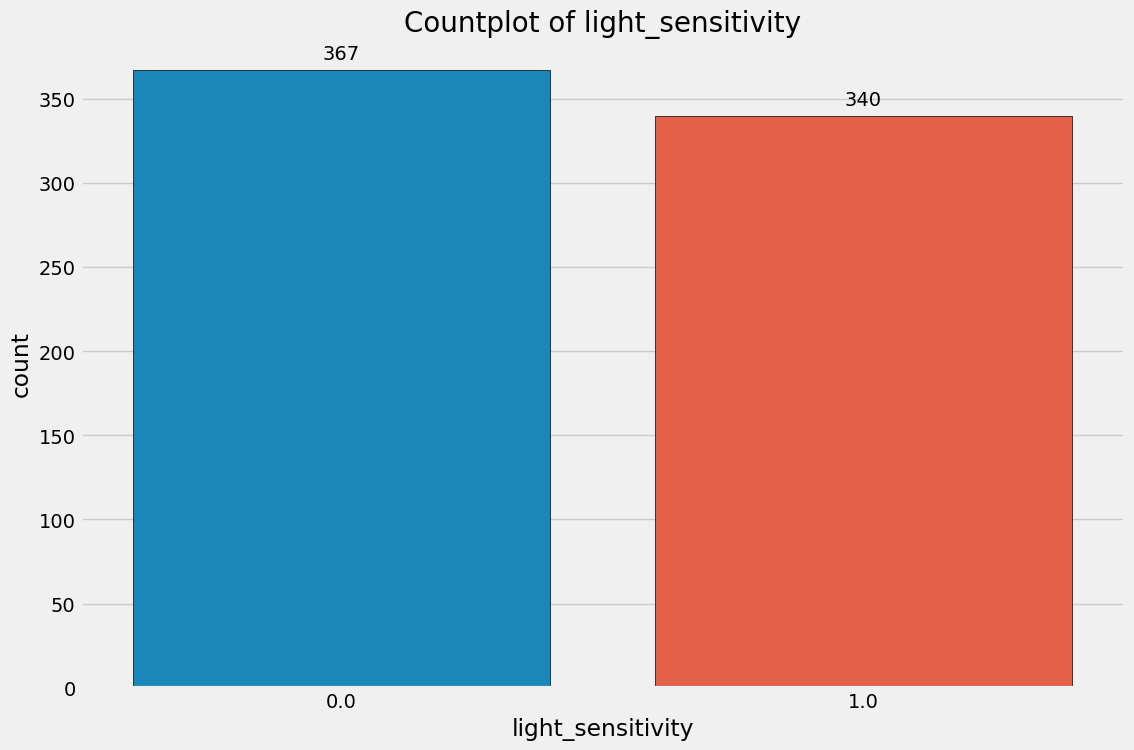

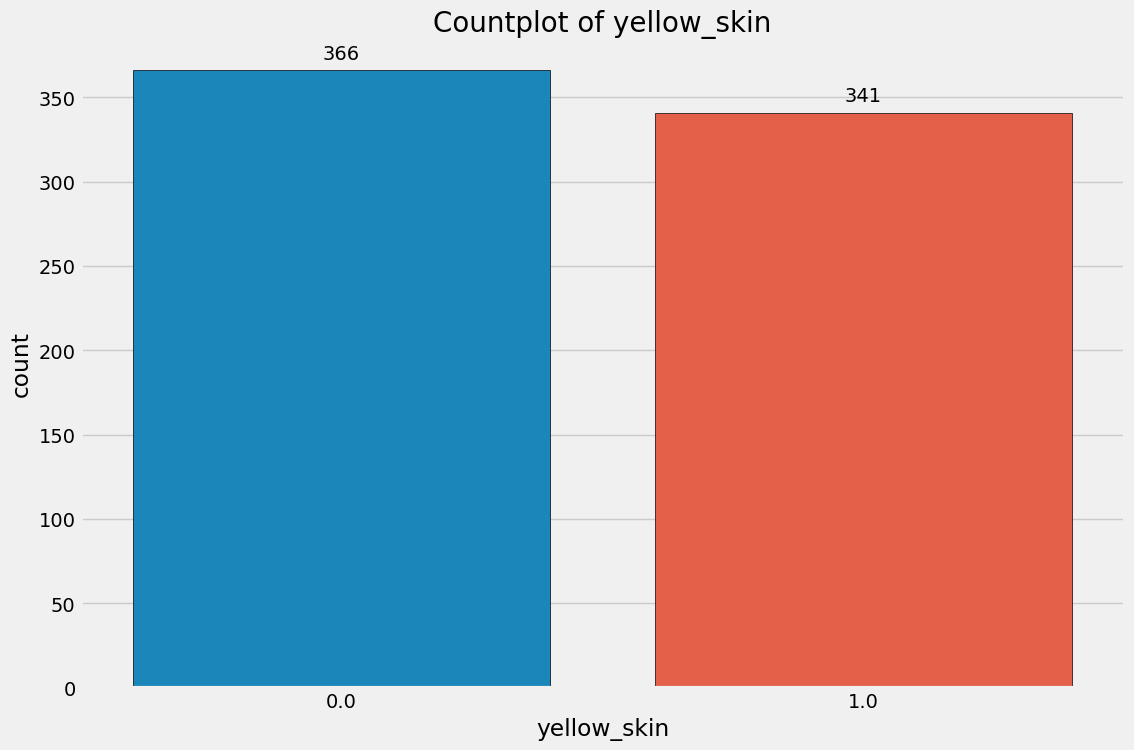

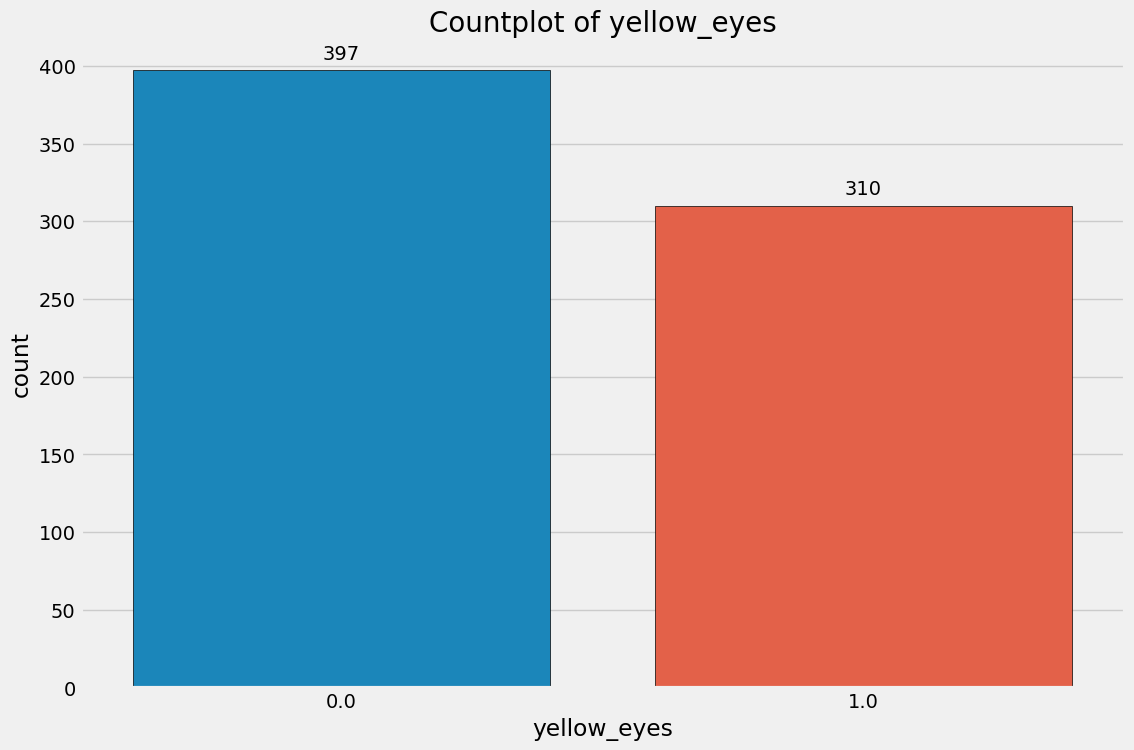

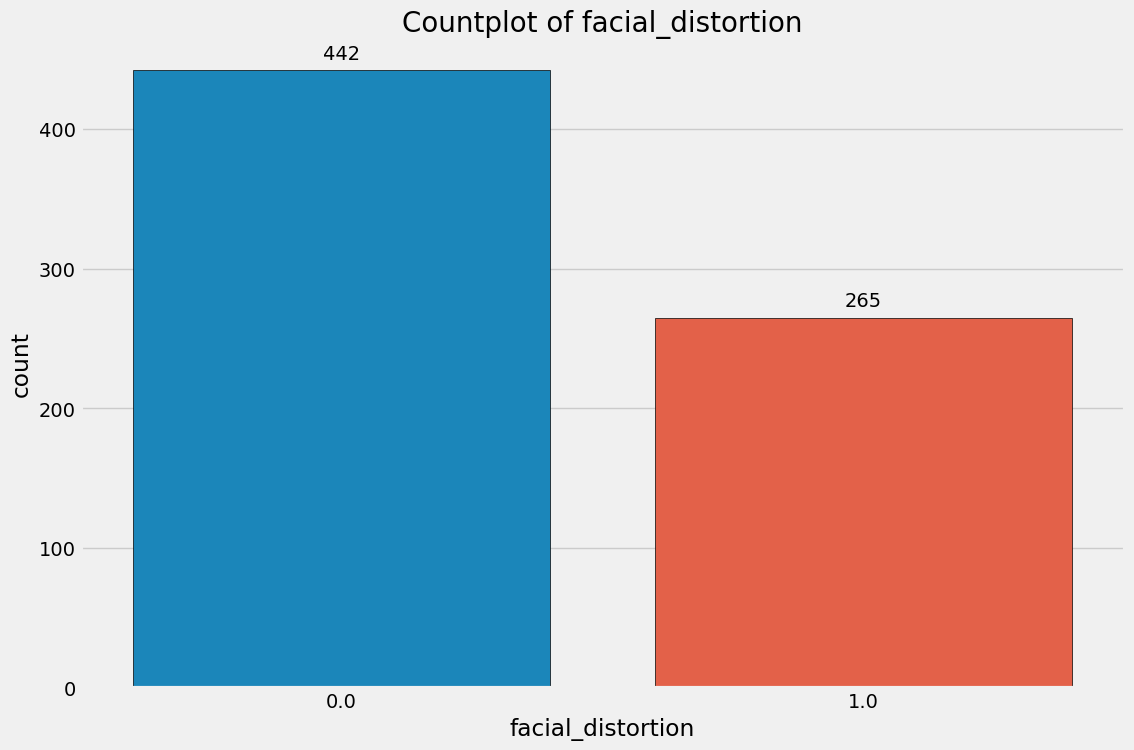

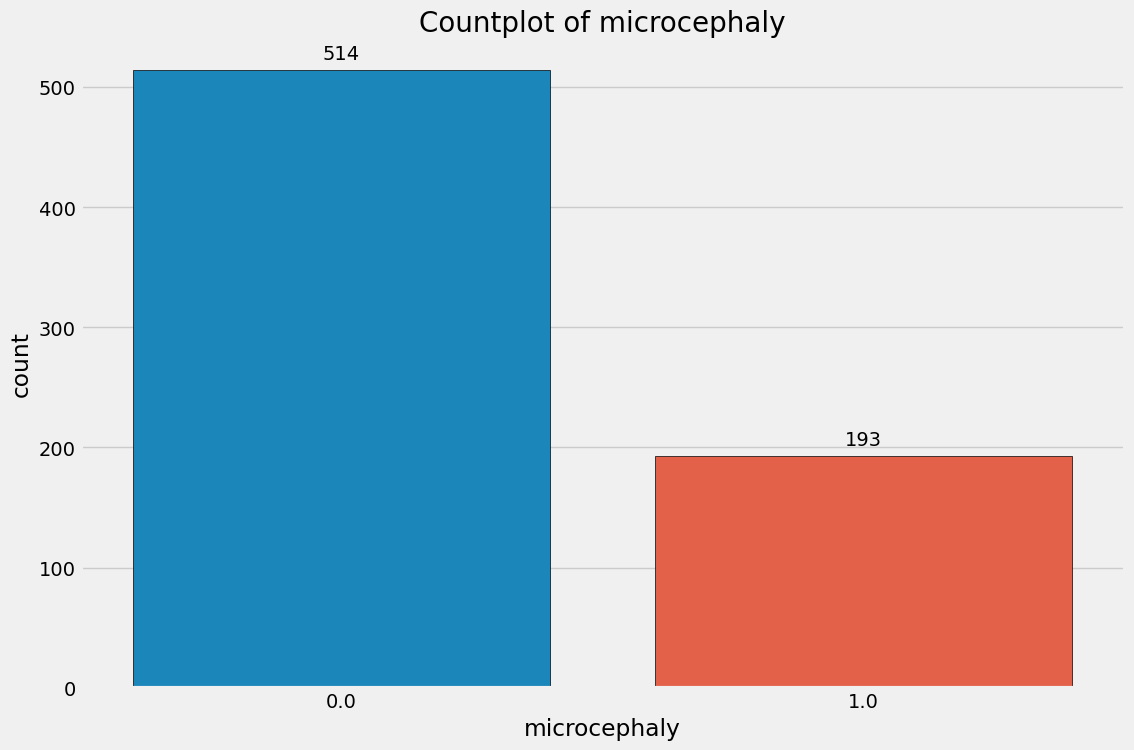

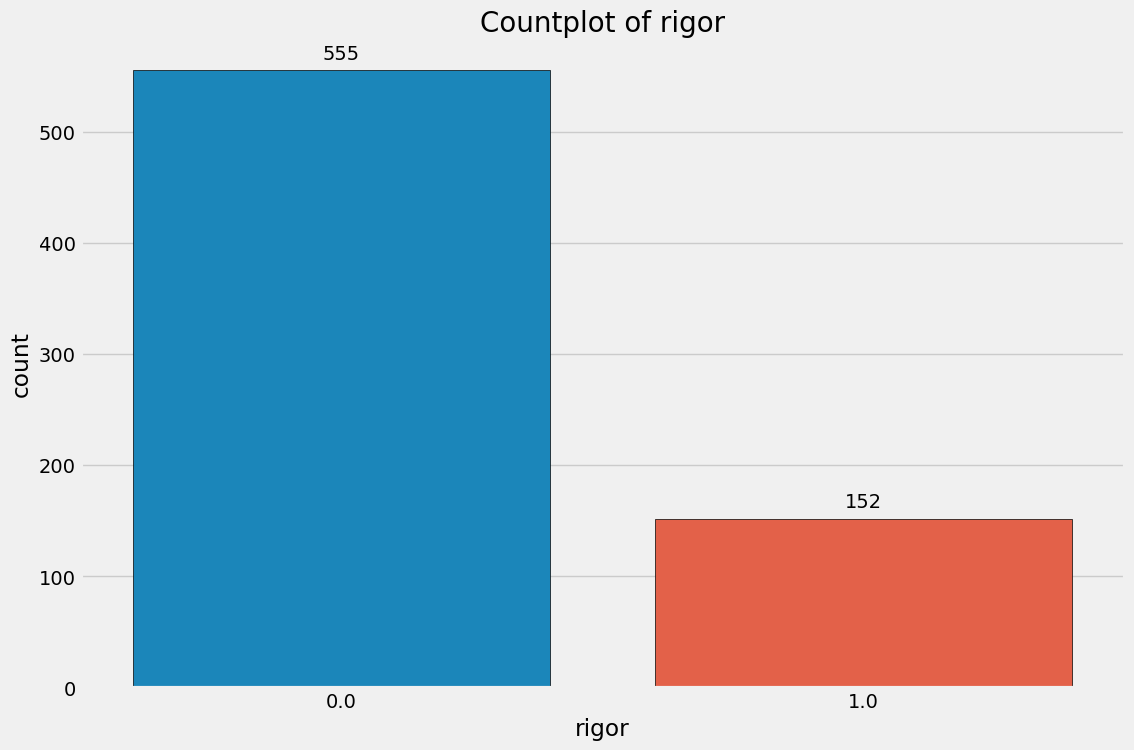

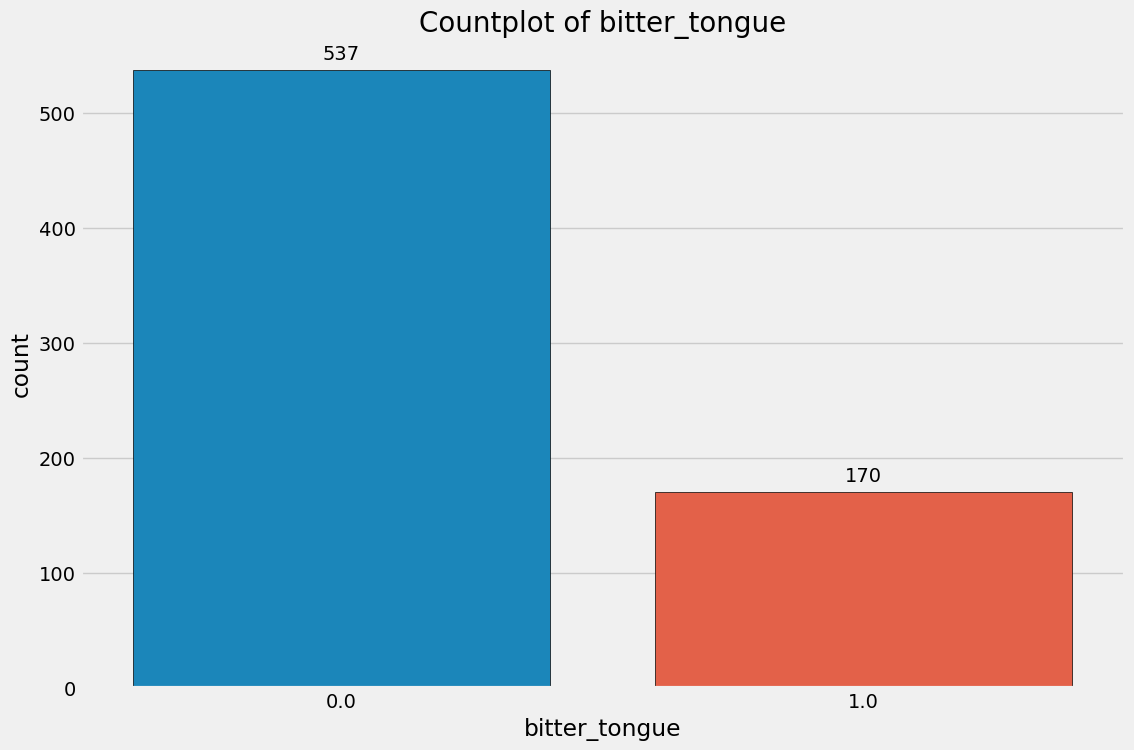

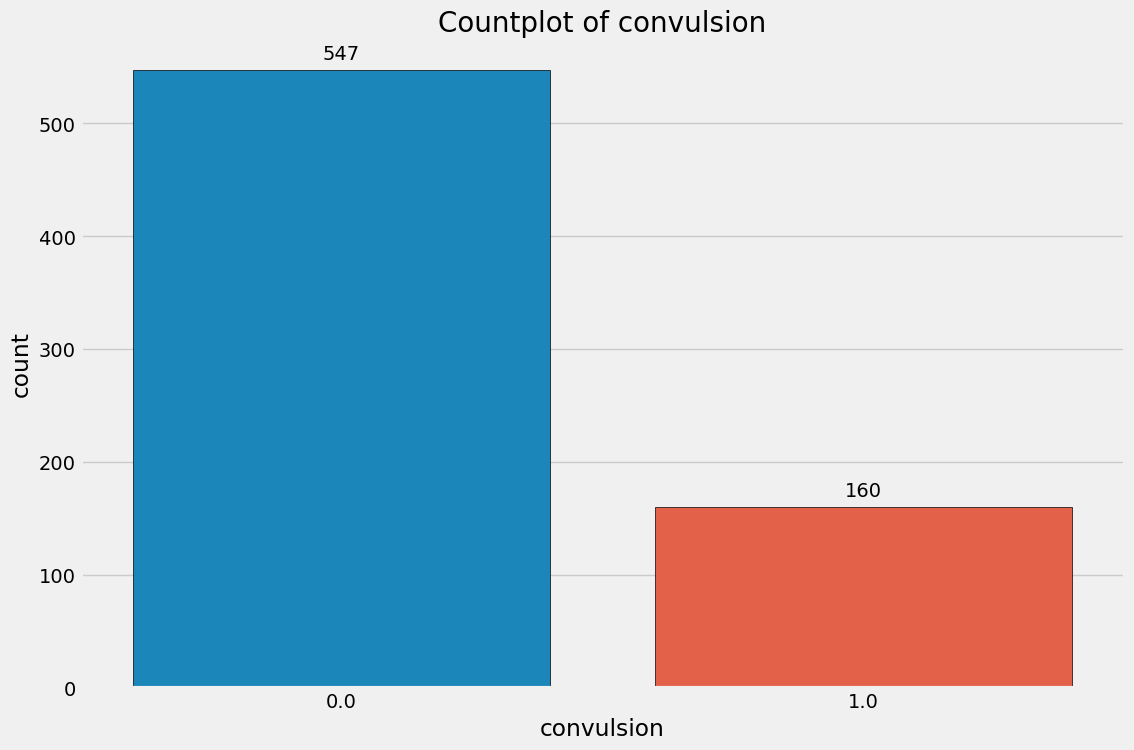

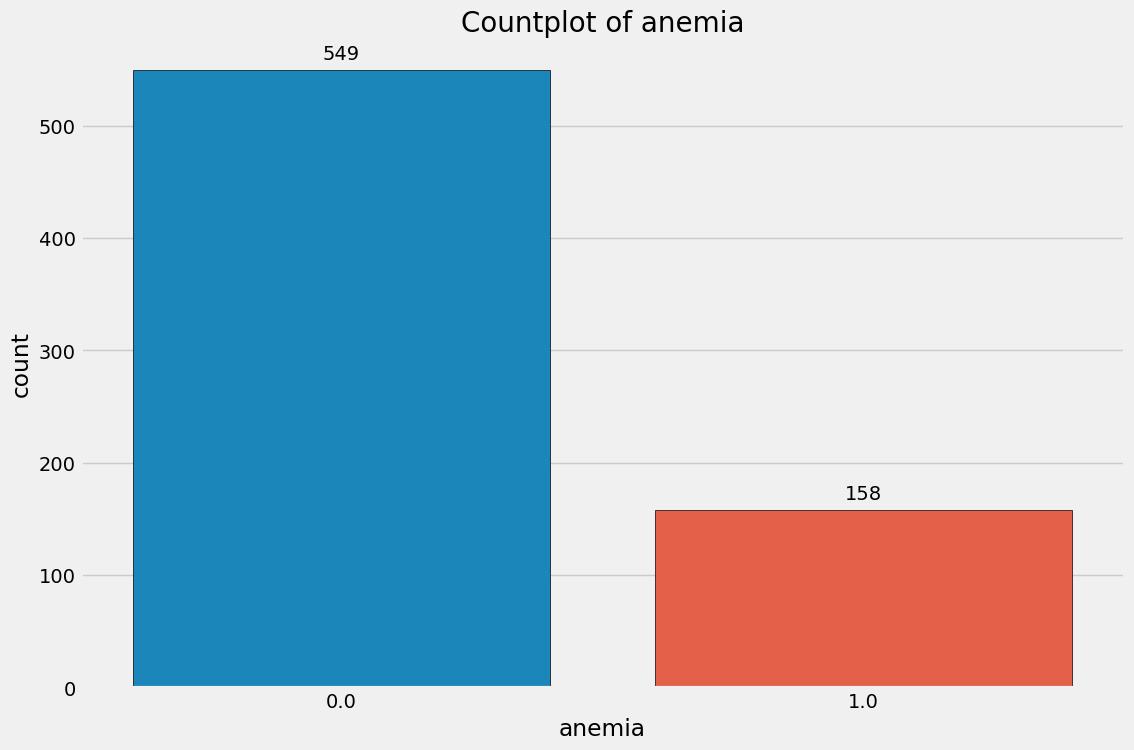

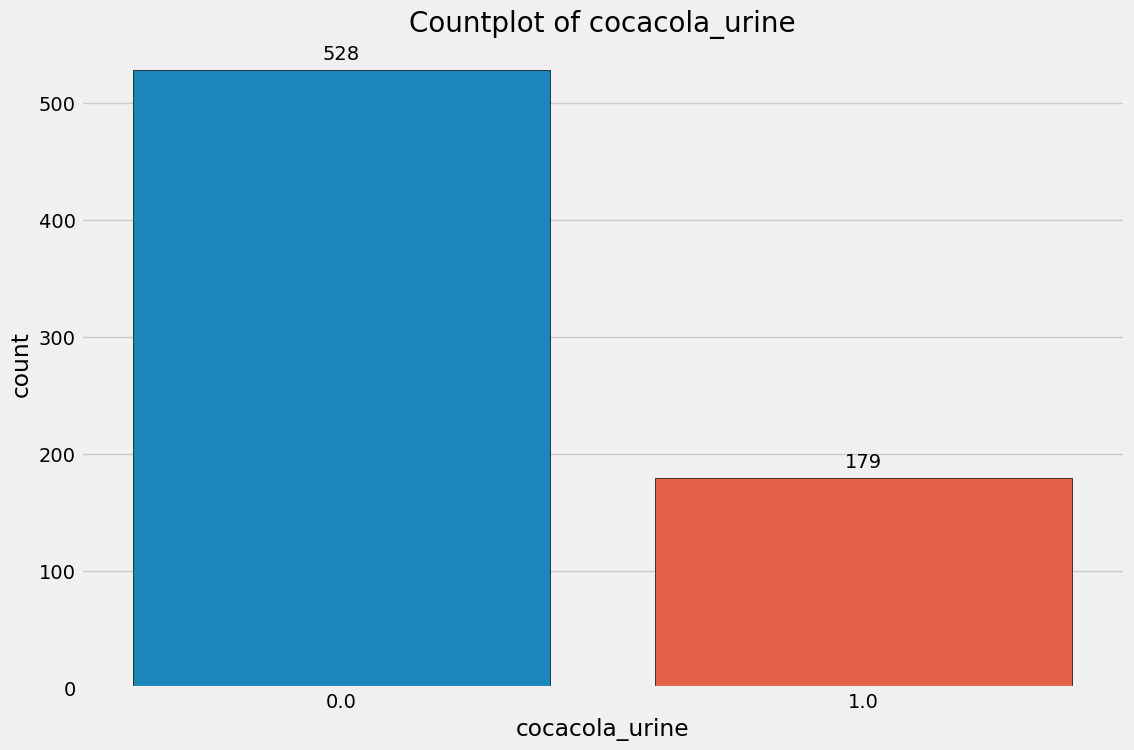

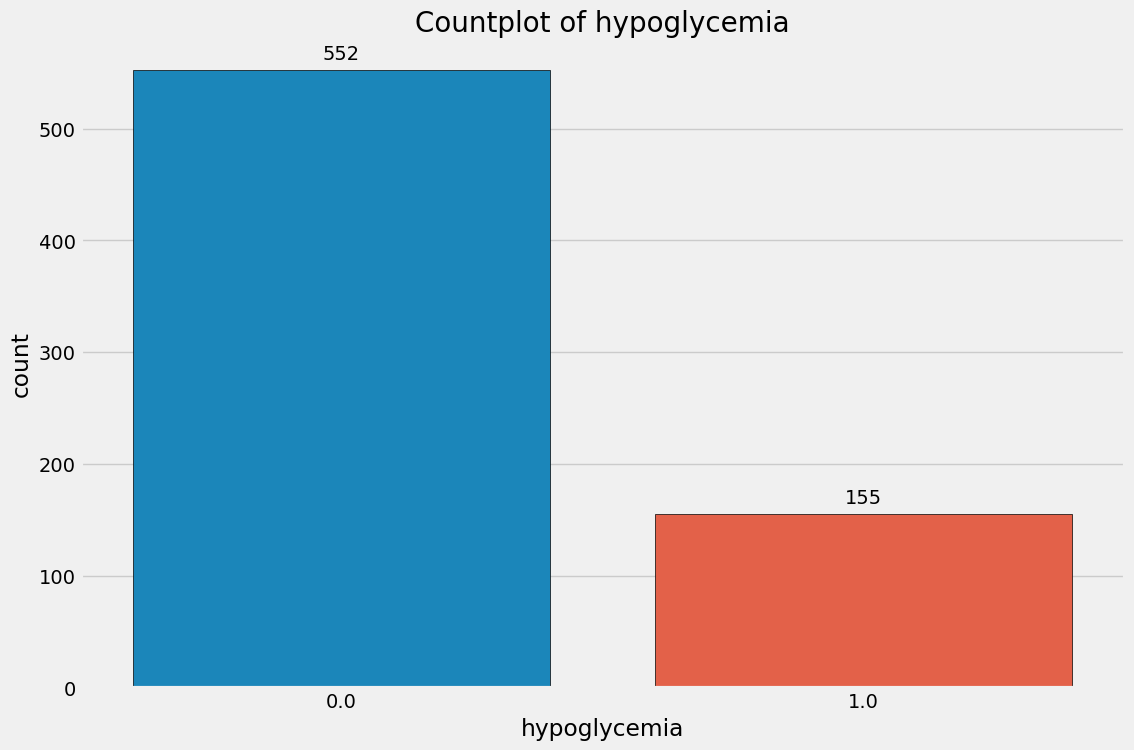

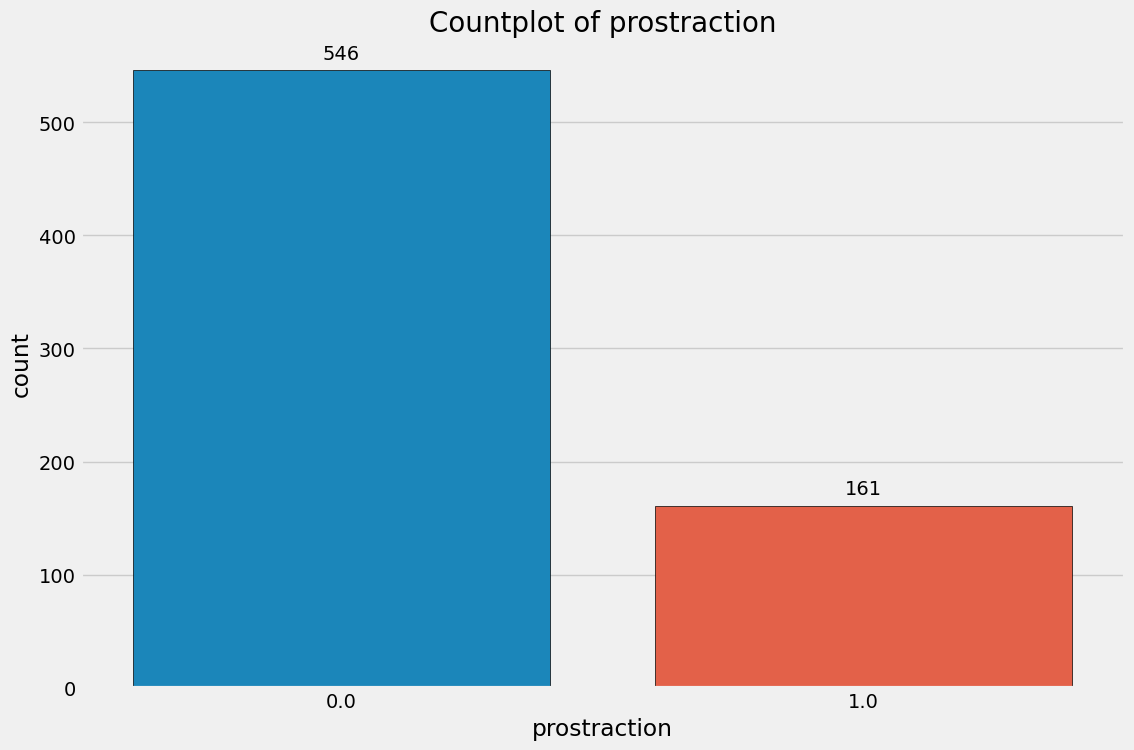

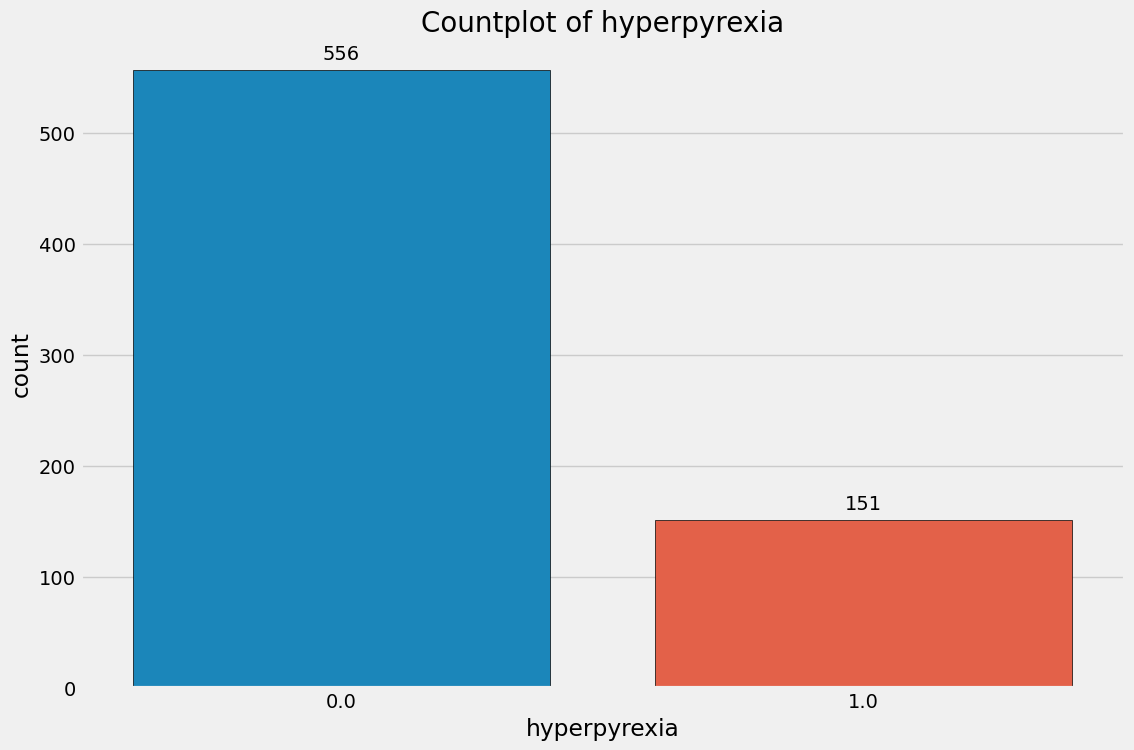

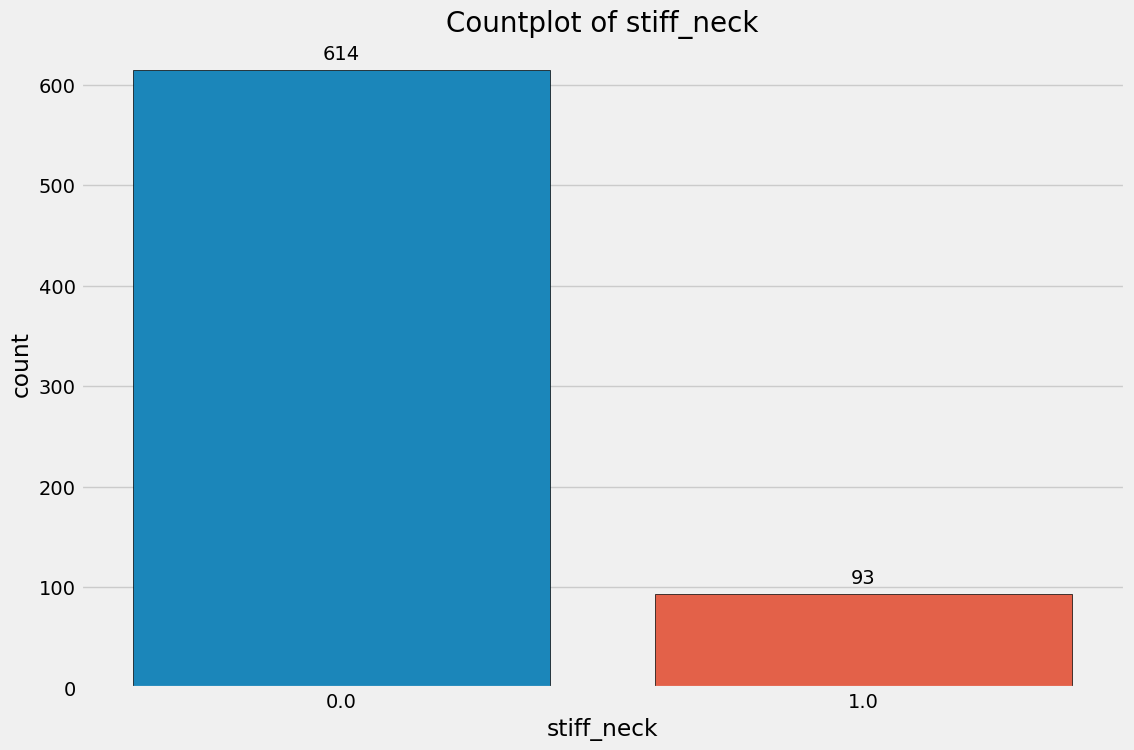

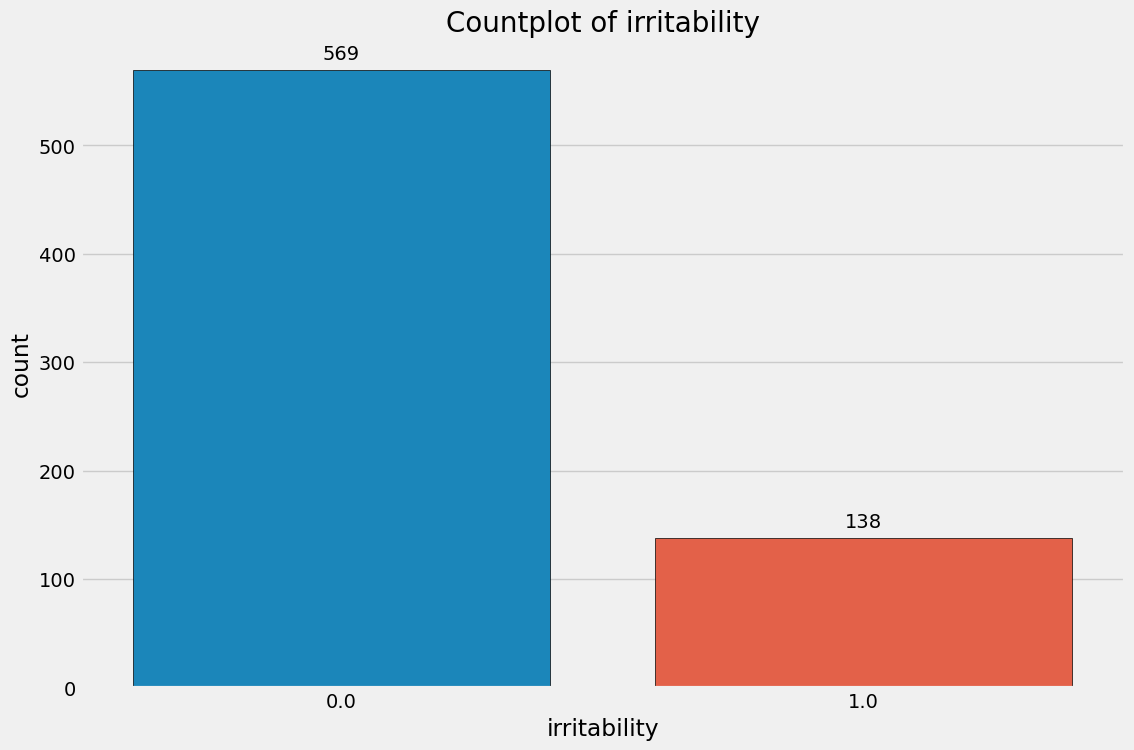

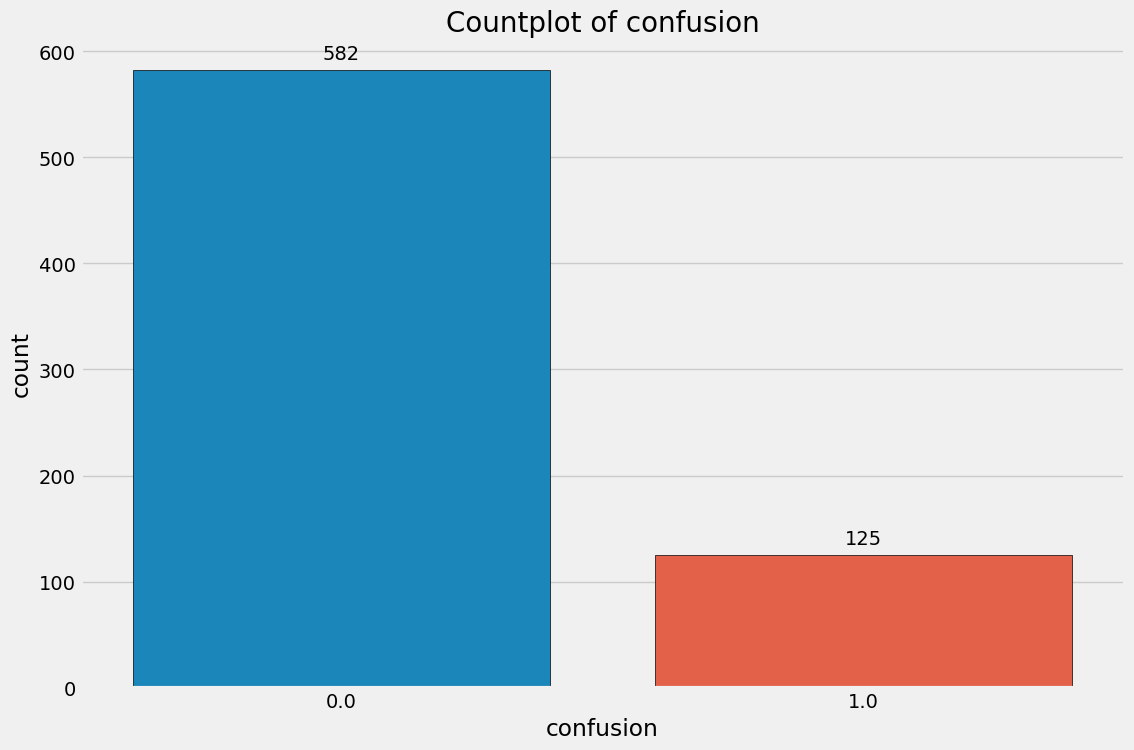

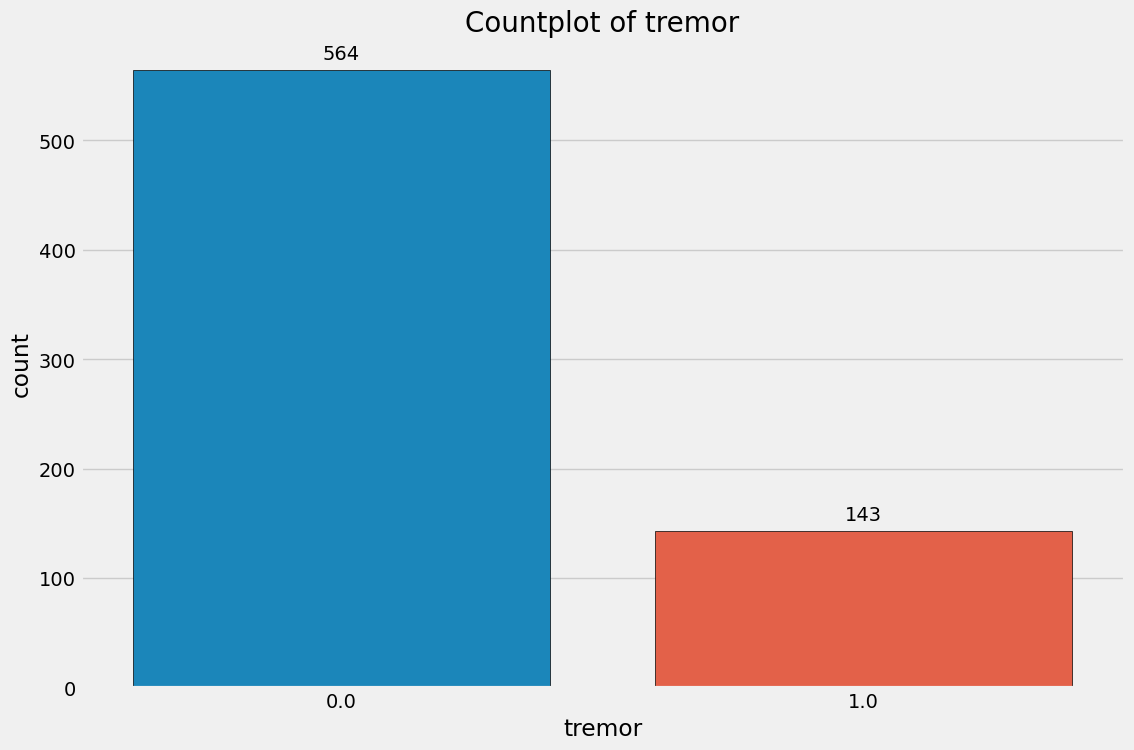

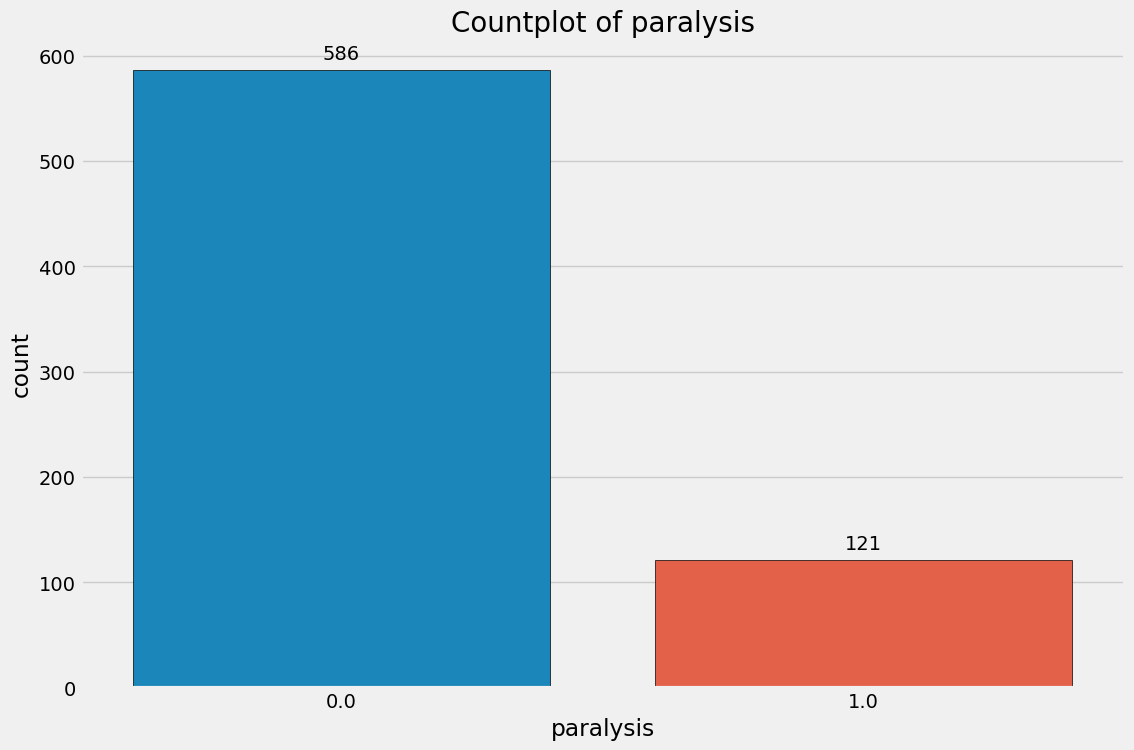

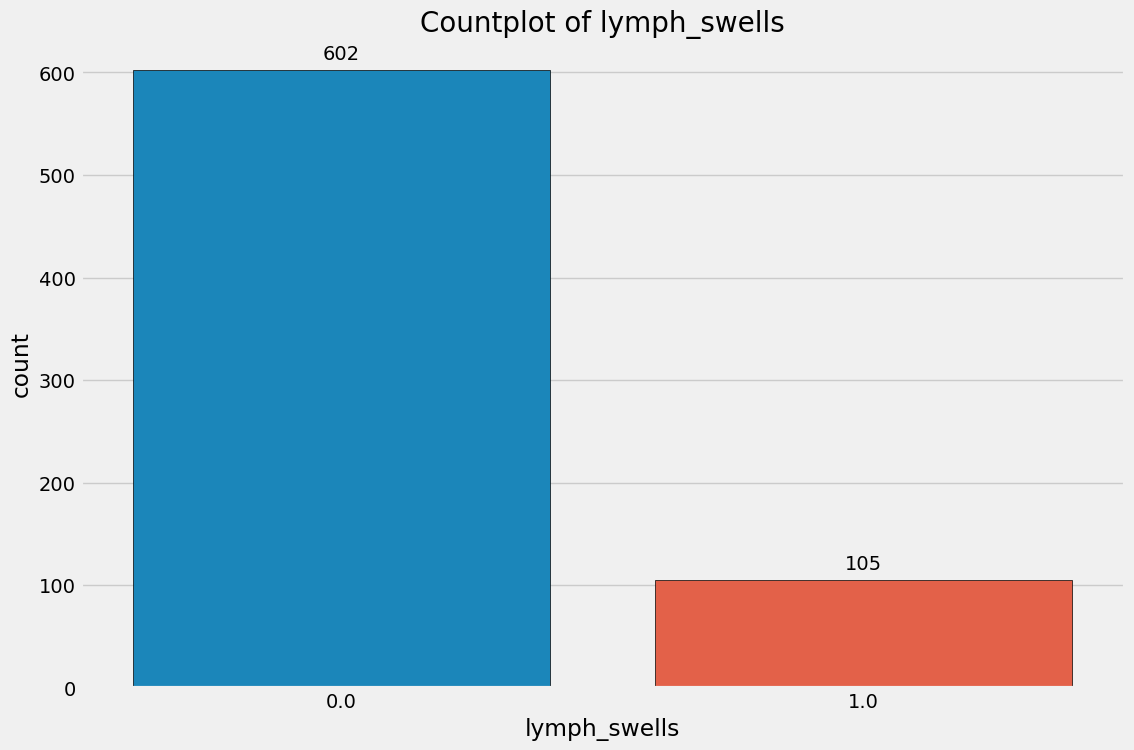

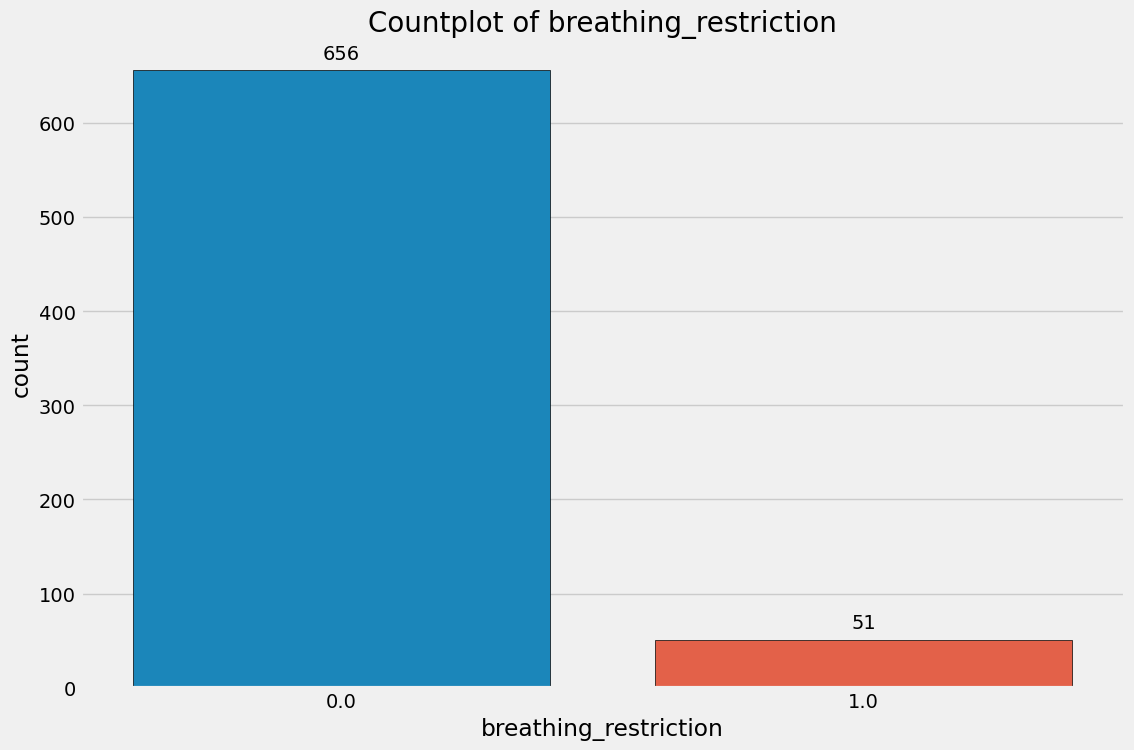

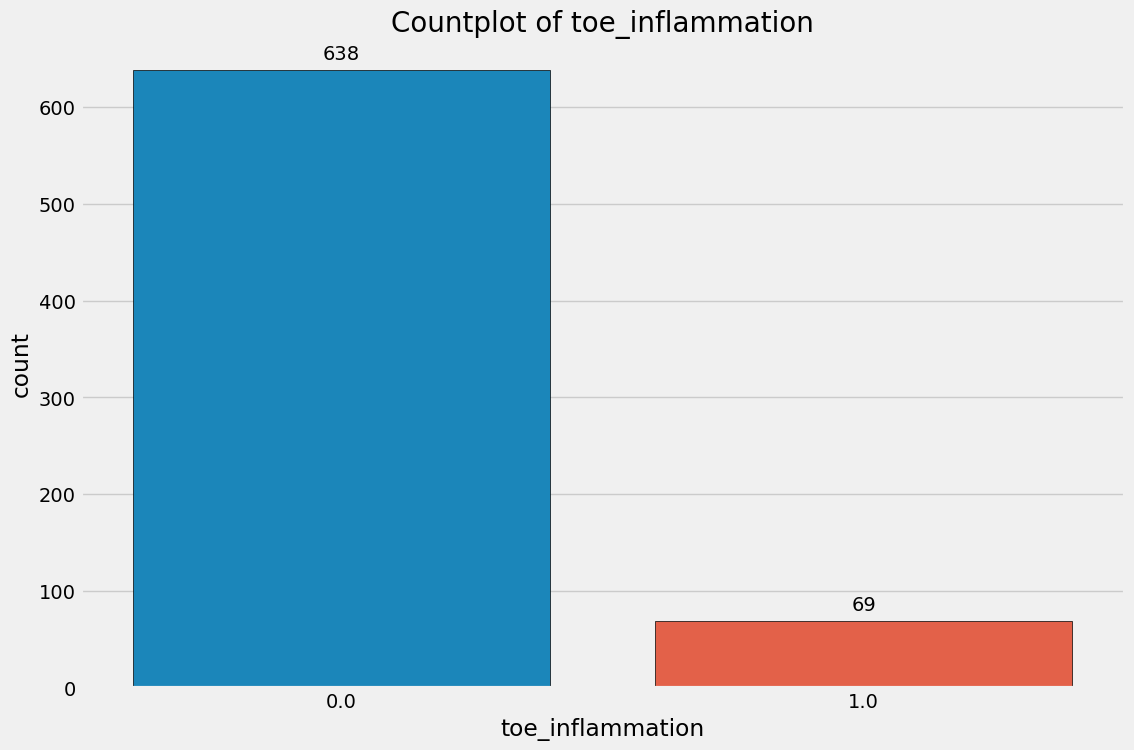

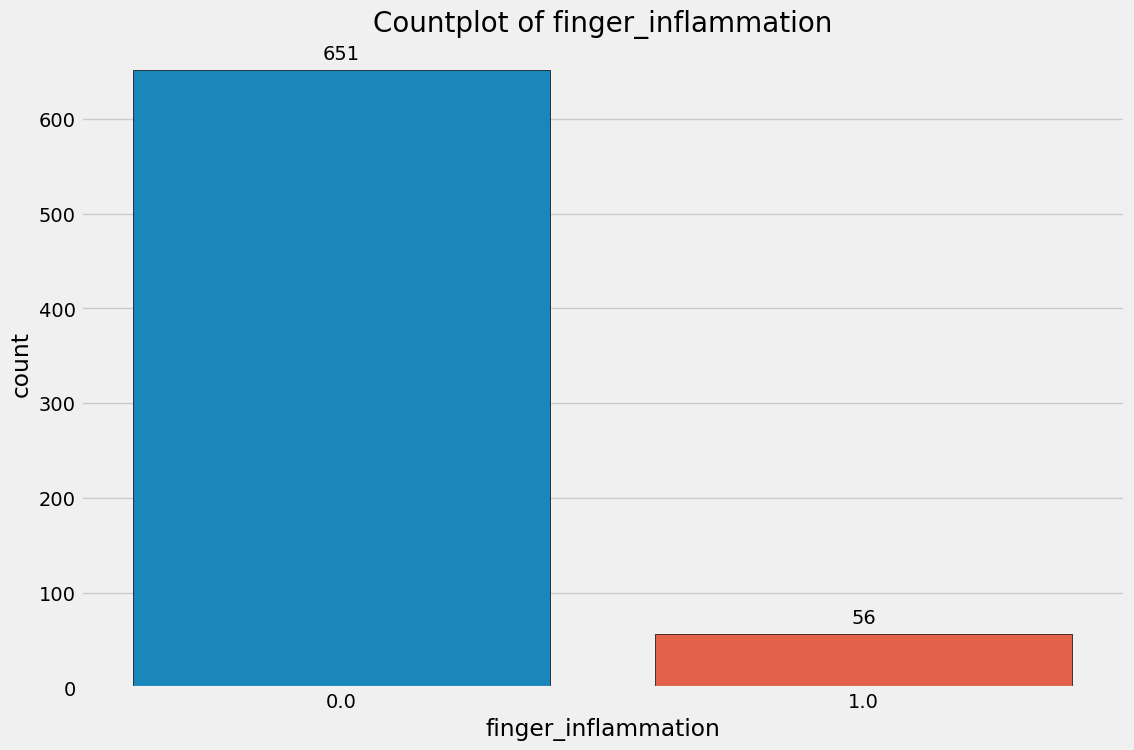

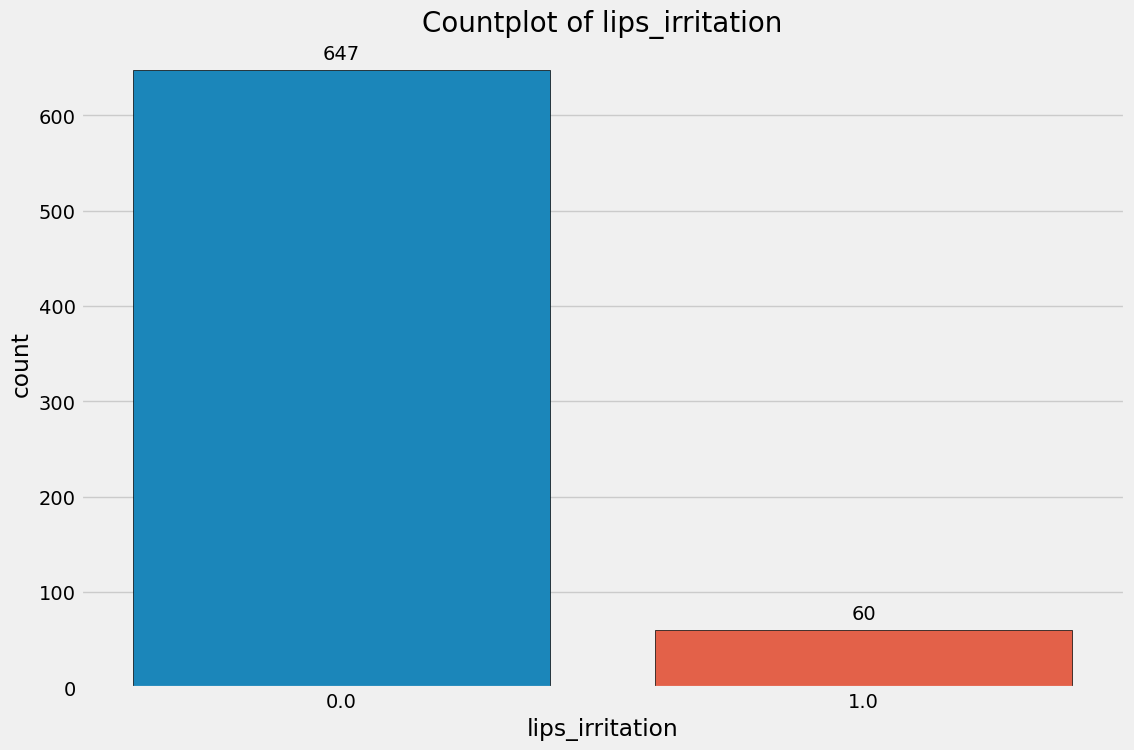

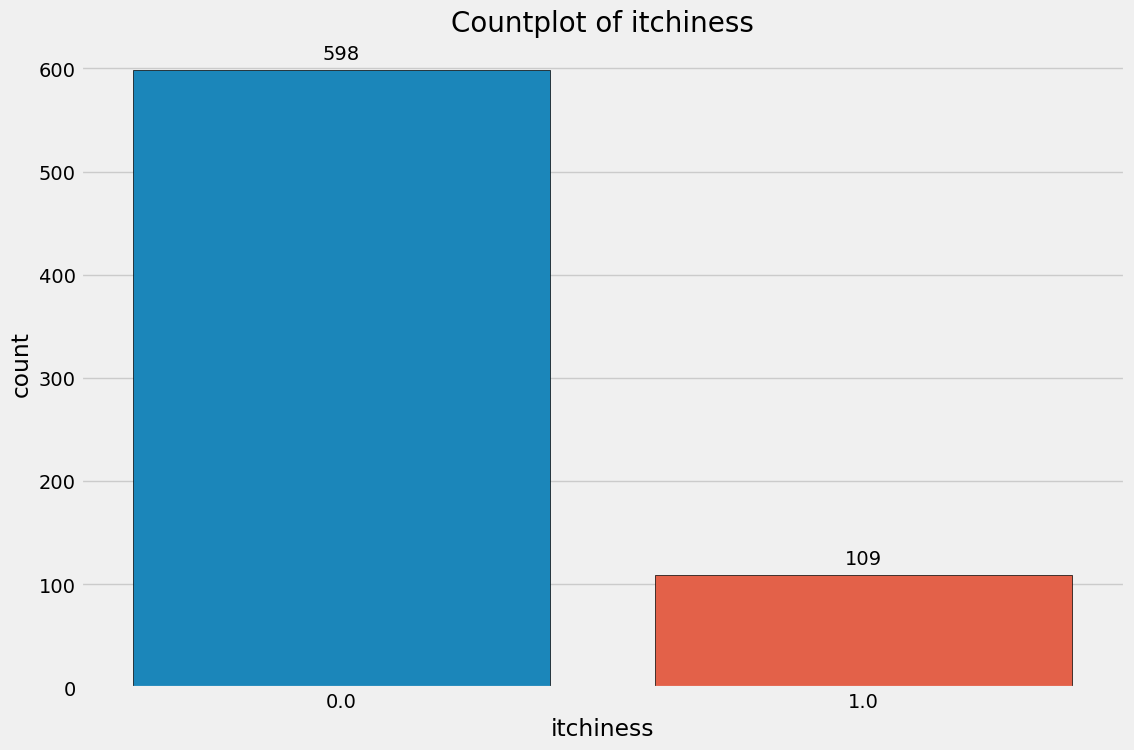

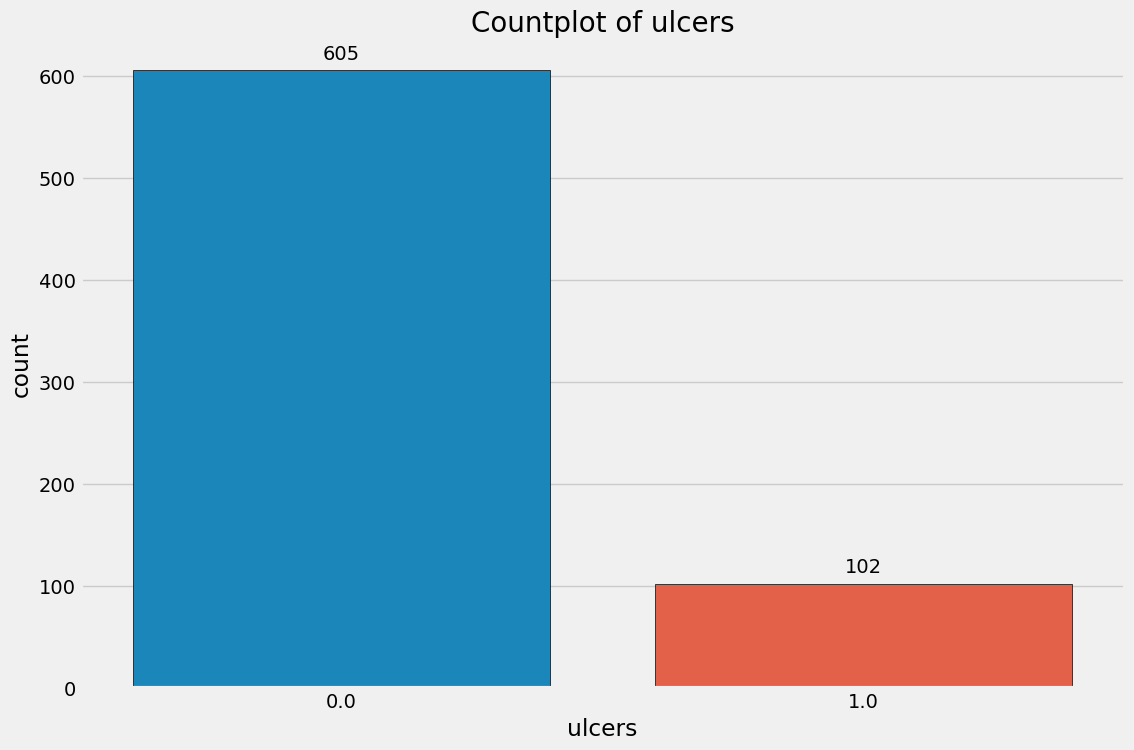

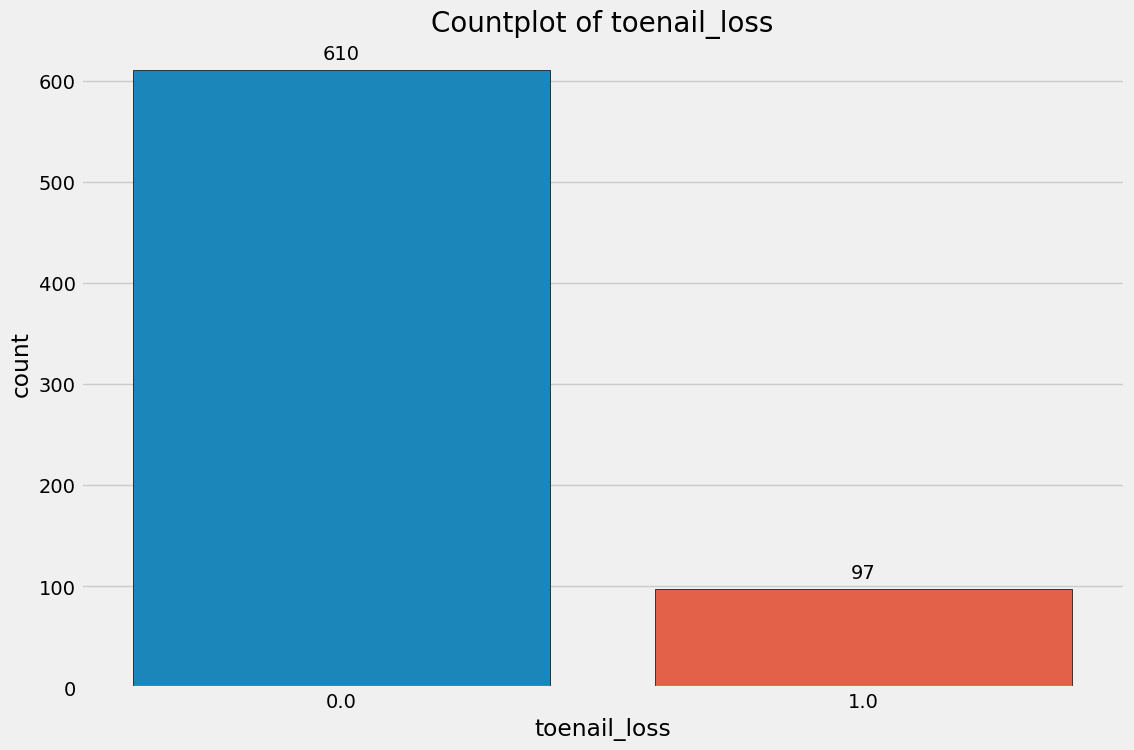

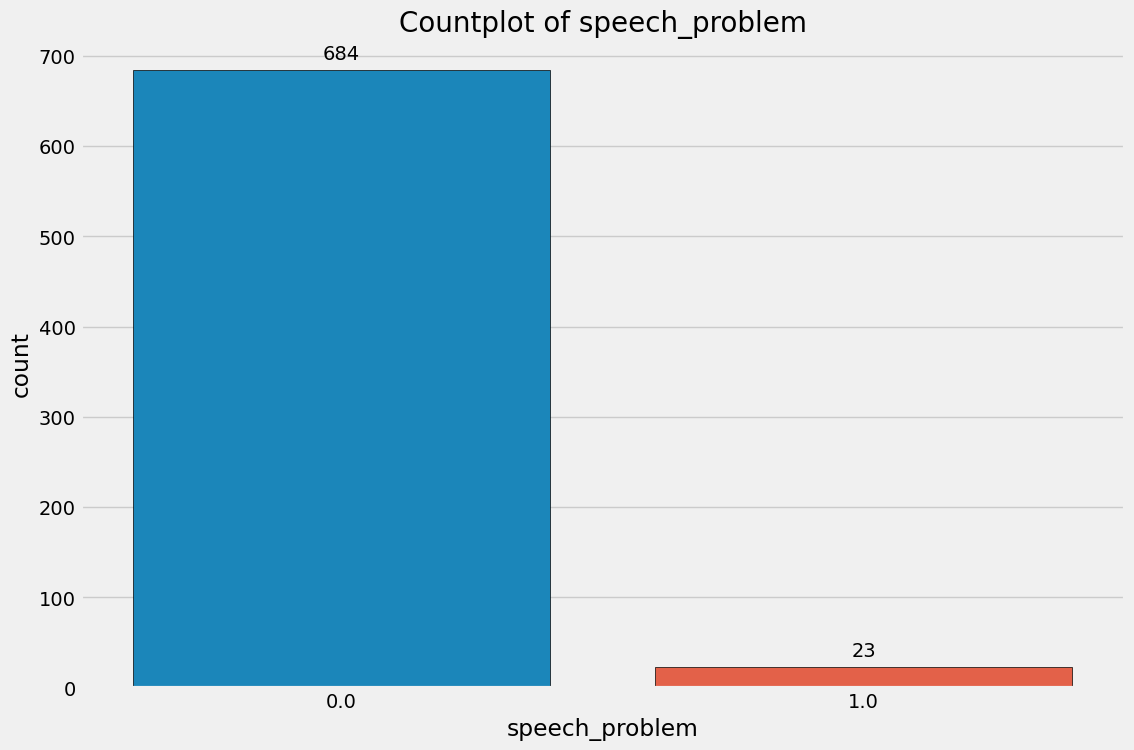

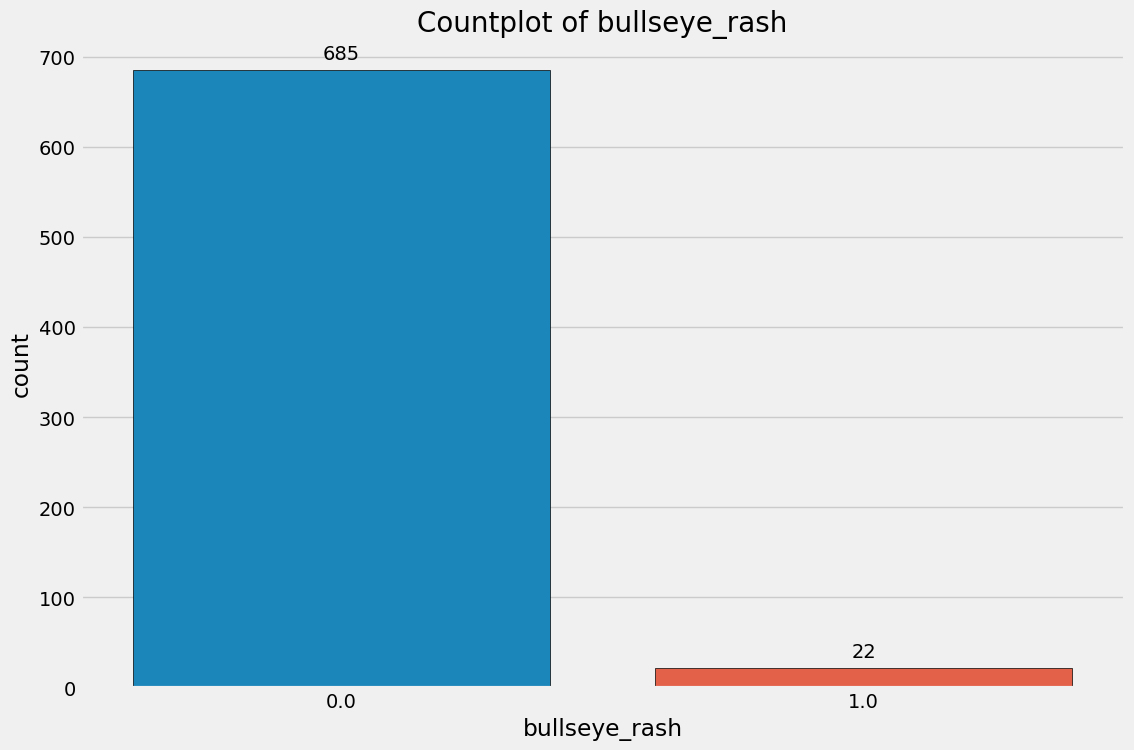

In [21]:
plt.figure(figsize=(3,3))
fe(train, target='prognosis')

## Data Preparation

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop('prognosis',axis=1), train['prognosis'], test_size=0.1, shuffle=True, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((636, 65), (71, 65), (636,), (71,))

In [43]:
def make_onehot(labels, n_classes):
    return np.array([[(i==j)*1 for i in range(n_classes)] for j in labels])

y_train = make_onehot(y_train, n_classes)
y_test = make_onehot(y_test, n_classes)

y_train.shape, y_test.shape

((636, 11), (71, 11))

## Model Development

In [44]:
scores = {}

#### Support Vector Classifier

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
scores['SVC'] = svc.score(x_train, y_train)
scores['SVC']

ValueError: y should be a 1d array, got an array of shape (636, 11) instead.

In [46]:
svc.score(test_x, test_y)
svc_pred = svc.predict(test_x)

#### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
scores['DTC'] = dtc.score(train_x, train_y)
scores['DTC']

1.0

In [27]:
dtc.score(test_x, test_y)
dtc_pred = dtc.predict(test_x)

#### Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y)
scores['GBC'] = gbc.score(train_x, train_y)
scores['GBC']

0.9968553459119497

In [29]:
gbc.score(test_x, test_y)
gbc_pred = gbc.predict(test_x)

#### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
scores['RFC'] = rfc.score(train_x, train_y)
scores['RFC']

1.0

In [31]:
rfc.score(test_x, test_y)
rfc_pred = rfc.predict(test_x)

#### Deep Learning Model

In [32]:
import tensorflow as tf
import tensorflow.keras as keras

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential([
    Dense(512, activation='relu', input_shape=[7]),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [19]:
history = model.fit(train_x, 
                    train_y, 
                    epochs=150,
                   validation_data=(test_x, test_y),
                    verbose=2,
                    batch_size=32,
                    shuffle=True)

Epoch 1/150
12/12 - 3s - loss: 0.6920 - accuracy: 0.5108 - val_loss: 0.6598 - val_accuracy: 0.6667 - 3s/epoch - 211ms/step
Epoch 2/150
12/12 - 0s - loss: 0.6755 - accuracy: 0.6022 - val_loss: 0.6164 - val_accuracy: 0.7381 - 159ms/epoch - 13ms/step
Epoch 3/150
12/12 - 0s - loss: 0.6297 - accuracy: 0.6801 - val_loss: 0.5406 - val_accuracy: 0.7381 - 153ms/epoch - 13ms/step
Epoch 4/150
12/12 - 0s - loss: 0.6212 - accuracy: 0.6720 - val_loss: 0.5265 - val_accuracy: 0.7619 - 140ms/epoch - 12ms/step
Epoch 5/150
12/12 - 0s - loss: 0.6071 - accuracy: 0.7043 - val_loss: 0.5528 - val_accuracy: 0.6905 - 137ms/epoch - 11ms/step
Epoch 6/150
12/12 - 0s - loss: 0.6030 - accuracy: 0.7151 - val_loss: 0.5218 - val_accuracy: 0.8571 - 137ms/epoch - 11ms/step
Epoch 7/150
12/12 - 0s - loss: 0.5923 - accuracy: 0.7151 - val_loss: 0.5105 - val_accuracy: 0.7857 - 140ms/epoch - 12ms/step
Epoch 8/150
12/12 - 0s - loss: 0.5866 - accuracy: 0.7124 - val_loss: 0.5178 - val_accuracy: 0.8095 - 128ms/epoch - 11ms/step
Ep

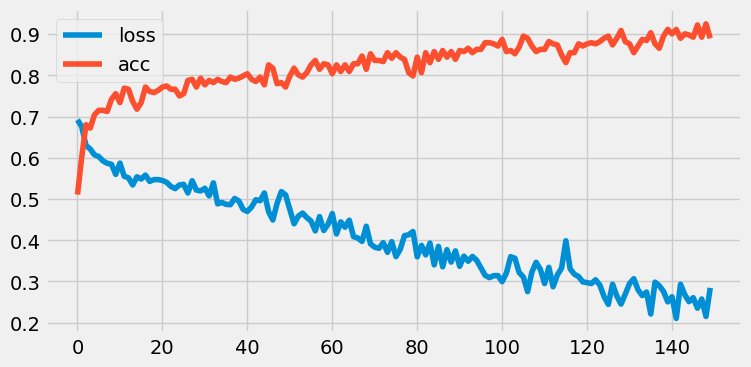

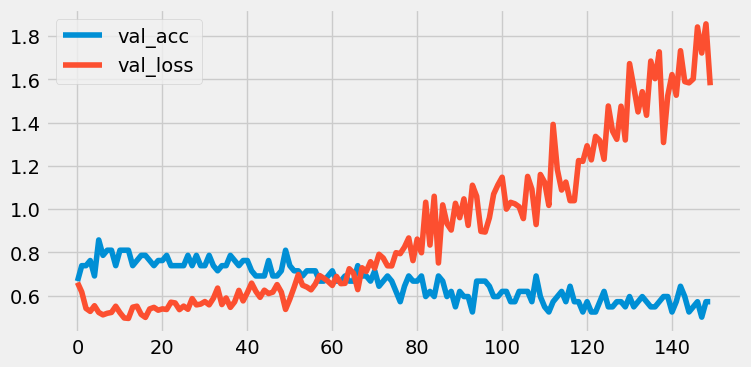

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='acc')
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
scores['DNN'] = model.evaluate(train_x, train_y)[-1]
model.evaluate(test_x, test_y)
dnn_pred = model.predict(test_x)

2/2 [==============================] - 0s 0s/step


## Evaluation

In [22]:
scores

{'SVC': 0.7956989247311828,
 'DTC': 1.0,
 'GBC': 0.9489247311827957,
 'RFC': 1.0,
 'DNN': 0.9193548560142517}

<AxesSubplot:title={'center':'Deep Neural Network - F1: 0.5'}>

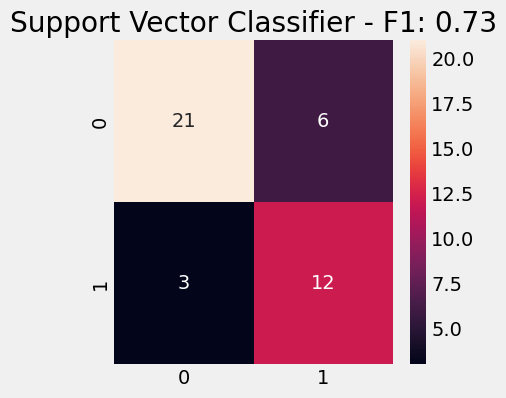

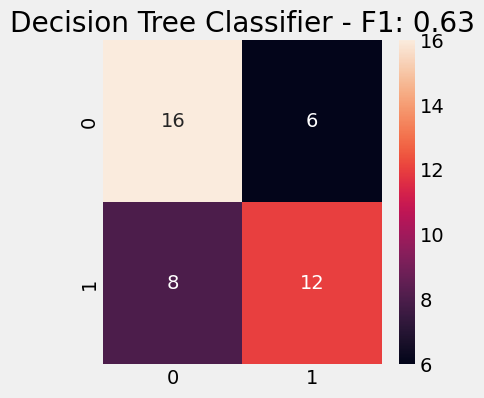

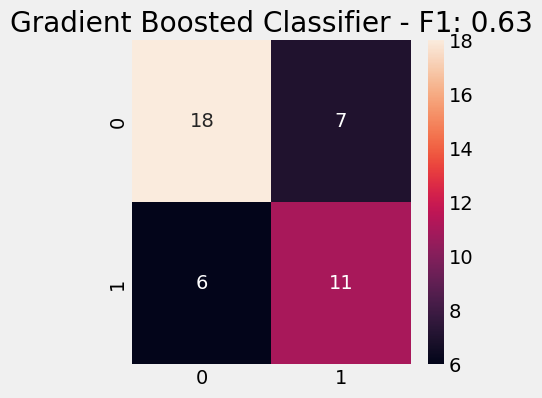

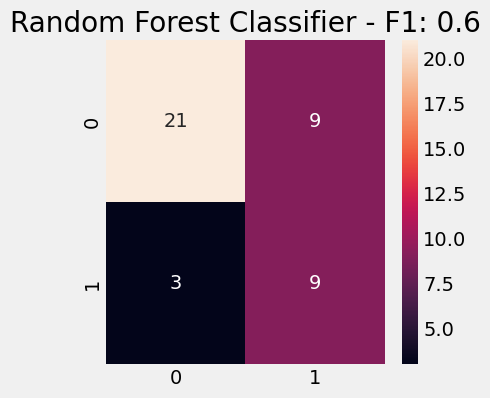

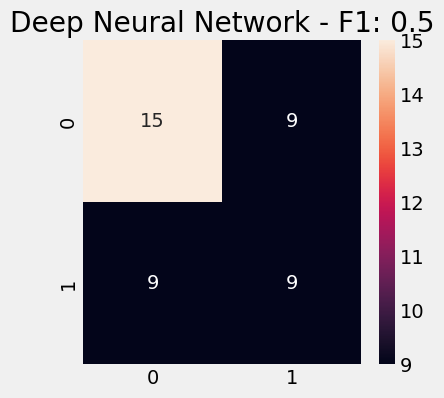

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

svc_cm = confusion_matrix(svc_pred, test_y)
dtc_cm = confusion_matrix(dtc_pred, test_y)
gbc_cm = confusion_matrix(gbc_pred, test_y)
rfc_cm = confusion_matrix(rfc_pred, test_y)
dnn_cm = confusion_matrix(np.round(dnn_pred), test_y)

plt.figure(figsize=(4,4))
plt.title(f'Support Vector Classifier - F1: {round(f1_score(svc_pred, test_y), 2)}')
sns.heatmap(svc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Decision Tree Classifier - F1: {round(f1_score(dtc_pred, test_y), 2)}')
sns.heatmap(dtc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Gradient Boosted Classifier - F1: {round(f1_score(gbc_pred, test_y), 2)}')
sns.heatmap(gbc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Random Forest Classifier - F1: {round(f1_score(rfc_pred, test_y), 2)}')
sns.heatmap(rfc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Deep Neural Network - F1: {round(f1_score(np.round(dnn_pred), test_y), 2)}')
sns.heatmap(dnn_cm, annot=True)